In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread

from IPython.display import display, HTML, Image

import time

from visualize_data import *

# <center>Analyzing the Impact of Pending and Executed Orders on Cryptocurrency Price Movements.<center>

## Contents
1. [Abstract](#1.-Abstract)   
2. [Introduction](#2.-Introduction)  
   2.1 [Order book](#2.1-Order-book)      
   2.2 [Market dynamics](#2.2-Market-dynamics)    
3. [Main hypothesis](#3.-Main-hypothesis)      
   3.1 [Metrics](#3.1-Metrics)     
   3.2 [Biases](#3.2-Biases)      
4. [Collecting data for the dataset](#4.-Collecting-data-for-the-dataset)     
   4.1 [Dataset](#4.1-Dataset)   
   4.2 [Features](#4.2-Features)     
5. [Analysis](#5.-Analysis)   
   5.1 [Dataset btc_eur_data overview](#5.1-Dataset-btc_eur_data-overview)  
   5.2 [Detail Analysis](#5.2-Detail-Analysis)                                    
       5.2.1 [Demand versus Price](#5.2.1-Demand-versus-Price)     
       5.2.2 [Price versus Time](#5.2.2-Price-versus-Time)   
       5.2.3 [Number of Тransactions versus Price](#5.2.3-Number-of-Тransactions-versus-Price)    
       5.2.4 [Transaction Count - Traded Quantities relation](#5.2.4-Transaction-Count---Traded-Quantities-relation)    
       5.2.5 [Price versus Traded Quantities](#5.2.5-Price-versus-Traded-Quantities)    
   5.3 [Supply versus Price](#5.3-Supply-versus-Price)    
       5.3.1 [Waiting Quantities versus Price](#5.3.1-Waiting-Quantities-versus-Price)   
   5.4 [Demand and Supply versus Price](#5.4-Demand-and-Supply-versus-Price)    
   5.5 [Numerical expression of Asks and Bids Forces](#5.5-Numerical-expression-of-Asks-and-Bids-Forces)     
   5.6 [Changing the metric for the balance coefficient](#5.6-Changing-the-metric-for-the-Balance-Coefficient)   
   5.7 [Testing the balance coefficient](#5.7-Testing-the-Balance-Coefficient)   
   5.8 [Dataset btc_eur_8_8_max_100 overview](#5.8-Dataset-btc_eur_8_8_max_100-overview)           
       5.8.1 [Examining the balance coefficient with smaller order book volumes](#5.8.1-Examining-the-balance-coefficient-with-smaller-order-book-volumes)
6. [Conclusion](#6.-Conclusion)
7. [Speculations](#7.-Speculations)
8. [Dictionary](#8.-Dictionary)

## 1. Abstract

$\quad$ What determines the price movements of cryptocurrencies? Put simply, the price of a given cryptocurrency is determined by how much interest there is in the market to buy (demand) as well as how much is available to buy (supply). If there is a high demand, but low supply, the price goes up. If there is a low demand, but a high supply, the price goes down. Despite this simple logic, predicting the prices of cryptocurrencies (as well as their prices, fiat currencies, stocks, etc.) remains a difficult and quite uncertain task. Numerous attempts in this direction have been made in recent years with the development of technologies related to artificial intelligence - [machine learning](https://en.wikipedia.org/wiki/Machine_learning), [neural networks](https://en.wikipedia.org/wiki/Neural_network) and [deep neural networks](https://en.wikipedia.org/wiki/Deep_learning). Here are a few examples of such attempts: ["Integrating Tick-level Data and Periodical Signal for
High-frequency Market Making"](https://arxiv.org/pdf/2306.17179.pdf), ["Predicting the Price Movement of Cryptocurrencies Using Linear
Law-based Transformation"](https://arxiv.org/pdf/2305.04884.pdf), ["Real-Time Prediction of BITCOIN Price using Machine 
Learning Techniques and Public Sentiment Analysis"](https://arxiv.org/ftp/arxiv/papers/2006/2006.14473.pdf).

$\quad$According to the simple logic of price movement presented in the previous paragraph, the main objective of this project is to investigate whether the volume of both pending and executed orders influences the price movement.

## 2. Introduction

$\quad$Currently, a vast (if not the entire) portion of cryptocurrency trading is conducted on specialized platforms called cryptocurrency exchanges. The most popular ones at the moment include [Binance](https://www.binance.com/), [Kraken](https://www.kraken.com/), [Coinbase](https://www.coinbase.com/exchange), [crypto.com](https://crypto.com/) and others. To ensure constant and smooth execution of transactions, they utilize powerful servers with immense computational capabilities. For the purposes of this project, it would be beneficial to provide a brief explanation of the mechanics of order execution in trading.

## 2.1 Оrder book

$\quad$The order book represents a list of all current trading orders for a given cryptocurrency on the exchange. This list reflects two main types of orders:

* [**Limit Orders**](#8.-Dictionary): These are orders that are executed only when a specific price is reached. For example, if an investor wants to buy **Bitcoin** at a price of **50,000 EUR** and places a limit order to buy at that price, the order will be executed only when the price of **Bitcoin** reaches or falls to **50,000 EUR**.

* [**Market Orders**](#8.-Dictionary): These are orders that are executed immediately at the current market price. If an investor wants to buy **Bitcoin** at the current moment and places a market order to buy, the order will be executed immediately at the current price of Bitcoin on the exchange.

$\quad$In order to ensure the sequence of orders, limit orders are executed chronologically in the order they are received. For example, the current price of the [currency pair](#8.-Dictionary) **BTC/EUR** is **25,000**. Trader **A** decides to buy **Bitcoin** for **100 EUR** at a lower price of **24,000** at 12:00 АМ. Another trader B decides to buy **Bitcoin** for **50 EUR** at the same price of **24,000** at 12:01 АМ. After some time, the price drops to the level of **24,000**, and then trader **C** decides to sell **Bitcoin** for **150 EUR**. Both pending orders will be executed, but trader **A**'s order will be executed first because it was placed before trader **B**'s order.

$\quad$The order book contains all the necessary information for this project. The volumes and prices of limit orders are directly related to the available supply, while the volumes and prices of market orders are related to the demand. 


## 2.2 Market dynamics

$\quad$Market dynamics is an extremely complex topic - a vast number of factors play a role in the price changes of stocks and currencies, making their prediction a significant challenge. There are two general strategies in attempts to predict future market movements:

* **Fundamental analysis**: [Fundamental analysis](https://www.investopedia.com/terms/f/fundamentalanalysis.asp) is based on the study of fundamental economic, financial, and political factors that can influence currency prices. This type of analysis is oriented towards evaluating the real value of a currency in the long term. Fundamental analyses include a review of economic data such as Gross Domestic Product (GDP), inflation, unemployment, interest rates, trade balance, political events, and others that can provide insights into the economic health of a country or region.

* **Technical analysis**: [Technical analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp) uses historical data of currency instrument prices and volumes to predict future market movements. This type of analysis is based on the assumption that historical prices and volumes can provide information about future price trends. Technical analysis utilizes various tools such as charts, indicators, and trend lines to analyze price movements and identify key entry and exit points for positions.

Overall, fundamental analysis focuses on evaluating the value of a currency based on economic data and events, while technical analysis focuses on analyzing price movements and patterns to predict future price trends. Typically, traders use both fundamental and technical analysis to make more comprehensive and informed decisions in currency market trading.

$\quad$This study will be based entirely on technical analysis for the following reasons:

1. Gathering and processing data is significantly easier compared to fundamental analysis. Here, for instance, only numerical data will be used, whereas a comprehensive fundamental analysis requires not only numbers but also the interpretation of factors such as political events, technological innovations, natural phenomena, and disruptions, etc.

2. The author of this project proceeds from the understanding that regardless of which factors have the strongest influence on market movements within a given time period, their effect will inevitably be reflected in the state of the order book.

The following hypothetical example will outline this logic. Let's say that at a given moment, one of the major cryptocurrency exchanges experiences a failure. This could lead people to lose trust in cryptocurrencies altogether, and in order to avoid losses, they will start selling their available cryptocurrencies, causing the price to drop. The actions of the traders in such a scenario will be reflected in a change in the state of the order book - the sell orders for cryptocurrencies will be withdrawn, and in their place, buy orders for fiat currencies will start to be executed and placed. In this sense, the reasons why the price falls or rises are irrelevant since they will inevitably be reflected in the order book.

$\quad$Efforts to trace the impact of the order book dynamics on prices have already been made. One notable example is the work conducted by [Cont, Kukanov and Stoikov, 2011](https://arxiv.org/pdf/1011.6402.pdf). Their research is based on data related to events in the order book of stock markets. However, it focuses on the problem of modeling stock prices rather than analyzing the data itself. This project, on the other hand, will specifically focus on data analysis.

## 3. Main hypothesis

$\quad$The main hypothesis in this project is as follows:

#### *<center> The dynamics of executed orders and the dynamics of market depth are the two main factors that drive price movement.<center>*
    
$\quad$This is a very strong statement, and that's why additional explanations are needed.
    

$\quad$The key word here is **'main'**. It implies that these factors are not the only ones - it's quite logical to assume that other dynamics and processes also play a role. However, the idea here is that these two factors take precedence over the others. Taking precedence over the other factors means having a higher degree of influence on price movement. For the purposes of this project, we assume that influence is measured by the degree of correlation between the dynamics of order execution and [market depth](https://www.investopedia.com/terms/d/depth-of-market.asp) dynamics on one hand, and price movement on the other. It's important to note that the direction of correlation doesn't matter - whether it's positive or negative - because in both cases, with a high correlation, we have a clearly defined relationship between the two.
    
$\quad$As it is known, a correlation between variables does not necessarily imply a causal one. In the realm of humor - all individuals who have consumed water at least once in their lifetime have died. However, this does not mean that they died because of water consumption. The same logic applies here - if we find a correlation, it doesn't necessarily mean that the two dynamics are influencing price movement. In this sense, the hypothesis loses its meaning right here. On the other hand, if indeed these two factors do influence the price, then it should manifest as a certain degree of correlation. In this sense, we can assume that the higher the degree of correlation, the more likely this correlation is due to a causal connection. Here arises the question: how high should this degree be exactly? Since we will be using the correlation method, which provides values in the range [-1, 1], 'strong correlation' means values close to either of the boundaries. As mentioned earlier, the direction of correlation doesn't matter, so we will use the absolute value of the correlation. Let's introduce the variable **$C$** as the correlation coefficient. Then we have:
    
$$C\in [-1; 1] \quad\quad\quad\quad(1)$$
    
In this project, we will consider that
    
$$|C| >= 0.85 \quad\quad\quad\quad(2)$$
    
means that the hypothesis is true, i.e., the dynamics of order execution and market depth indeed influence the price movement. Why exactly this value - 0.85 (85%)? For the following reasons:
    
1. As mentioned earlier, the influence of other factors is not excluded. The author of this project does not know exactly what these factors are, how many of them exist, and how they individually or in different combinations affect the price. Since these factors are unknown, there is no way to investigate them individually, in combination, or to compare them with the factors under study in this project. However, their influence should have a measurable effect on the price, which could 'cancel out' to some extent the impact of the two main factors. Therefore, if these unknown factors have less than a 15% impact on the price, we consider that the dynamics of order execution and market depth outweigh the influence of the other factors and we can confirm the hypothesis that they are the two main factors determining the price.
    
2. Perhaps 85% seems like a small value - in many other cases of hypothesis testing, it indeed doesn't provide a high level of confidence in the truth of the hypothesis. However, the situation here is a bit different. Finding a high degree of correlation between certain factors and the movements of cryptocurrency prices **automatically implies that it can be predicted**. The problem of price prediction has been tackled by thousands and tens of thousands of individuals for years, generally without success, as it's well-known that around [95%](https://www.bing.com/search?pglt=41&q=How+much+of+the+traders+loss+money&cvid=9deaebabcdd845509a4d285500248888&aqs=edge..69i57j0l8.9597j0j1&FORM=ANAB01&PC=U531) of traders ultimately end up with losses. This demonstrates that the problem is indeed challenging to solve, and thus, 85% represents a very high level of confidence. Trading cryptocurrencies to some extent is speculative (and this holds particularly true due to their high [volatility](#8.-Dictionary)), and if someone is 85% certain about the future price after a given period, it's a significant achievement.
    
$\quad$Now, let's explain in more detail the 'correlation' of what. The answer is - correlation of 'behaviors'. In other words, whether specific behaviors of the two dynamics correlate with other behaviors in the movement of the price. Generally speaking, the behaviors of the price can be classified into two categories - it either changes (up or down) compared to the previous moment, or it remains unchanged. Since the price movement is a function of time, it makes sense to talk about change or stasis within a certain time interval, as well as within a specific range of its values. For example, the price of the currency pair **BTCEUR** has been fluctuating between **26,000** and **26,200** over the last two hours. The same applies to the relationship between executed orders and pending orders. Why the 'relationship' between the two, rather than each one separately, will be explained below.
    
$\quad$Let's return to the hypothesis. The impact of the dynamics of executed orders and the dynamics of market depth on price movement can be divided into four main cases.
    
1. High demand for **BTC** (indicated by large volumes of executed orders) and low supply (indicated by a small amount of **BTC** in pending orders). This should lead to an increase  in the price of the **BTCEUR** pair. 

2. High demand for **BTC** and a high supply (the reverse scenario - low demand and low supply - is equivalent to this). The high supply should meet the demand and therefore a significant increase (or decrease in the opposite sceanario) in price is not expected.
    
3. High demand for **EUR** and a low supply. This should lower the price of the **BTCEUR** pair.
    
4. High demand for **EUR** and a high supply (the reverse). Significant price decreases (or increases in the opposite scenario) are not expected due to the same considerations mentioned in point 2.
    

$\quad$This is why the two factors should have an impact only in combination - i.e. in their relation to each other, and not separately. Anyway, in the analysis below, they will be examined both individually and together.

## 3.1 Metrics

$\quad$Since we will be checking for correlations between individual factors тhe metric we will use is [Pearson Correlation Coefficient](https://www.scribbr.com/statistics/pearson-correlation-coefficient/) and its implementation in the Pandas method corrcoeff().

## 3.2 Biases

$\quad$Understandably, the author of this project strongly desires the hypothesis to be true. This could lead to distortions both in its formulation and in the selection of metrics and subsequent analysis.

## 4. Collecting data for the dataset

$\quad$The data for this project is collected from the [Binance exchange](https://www.binance.com/bg/trade/BTC_EUR?theme=dark&type=spot). Binance provides a good [library](https://docs.binance.us/?python#introduction) for data collection. Here we will only take advantage of two functionalities - the methods [**get_recent_trades()**](https://binance-docs.github.io/apidocs/spot/en/#recent-trades-list) - a list of dictionaries with information about executed trades - and [**get_order_book()**](https://binance-docs.github.io/apidocs/spot/en/#order-book) - a dictionary with real-time information about prices and volumes. Some limitations in these methods necessitate collecting data in real-time. For a more comprehensive analysis, data needs to be collected for longer periods - on the order of hours and days. While **get_recent_trades()** provides information about executed trades back in time, it may not be sufficient for the needs of this project. On the other hand, **get_order_book()** does not provide information about past states of pending orders, only the current state. The entire functionality for data collection is located in the file **collect_data.py**.

## 4.1 Dataset

$\quad$Before we focus on the dataset itself, let's examine the trading dashboard on the Binance website. The next figure shows a screenshot of it.

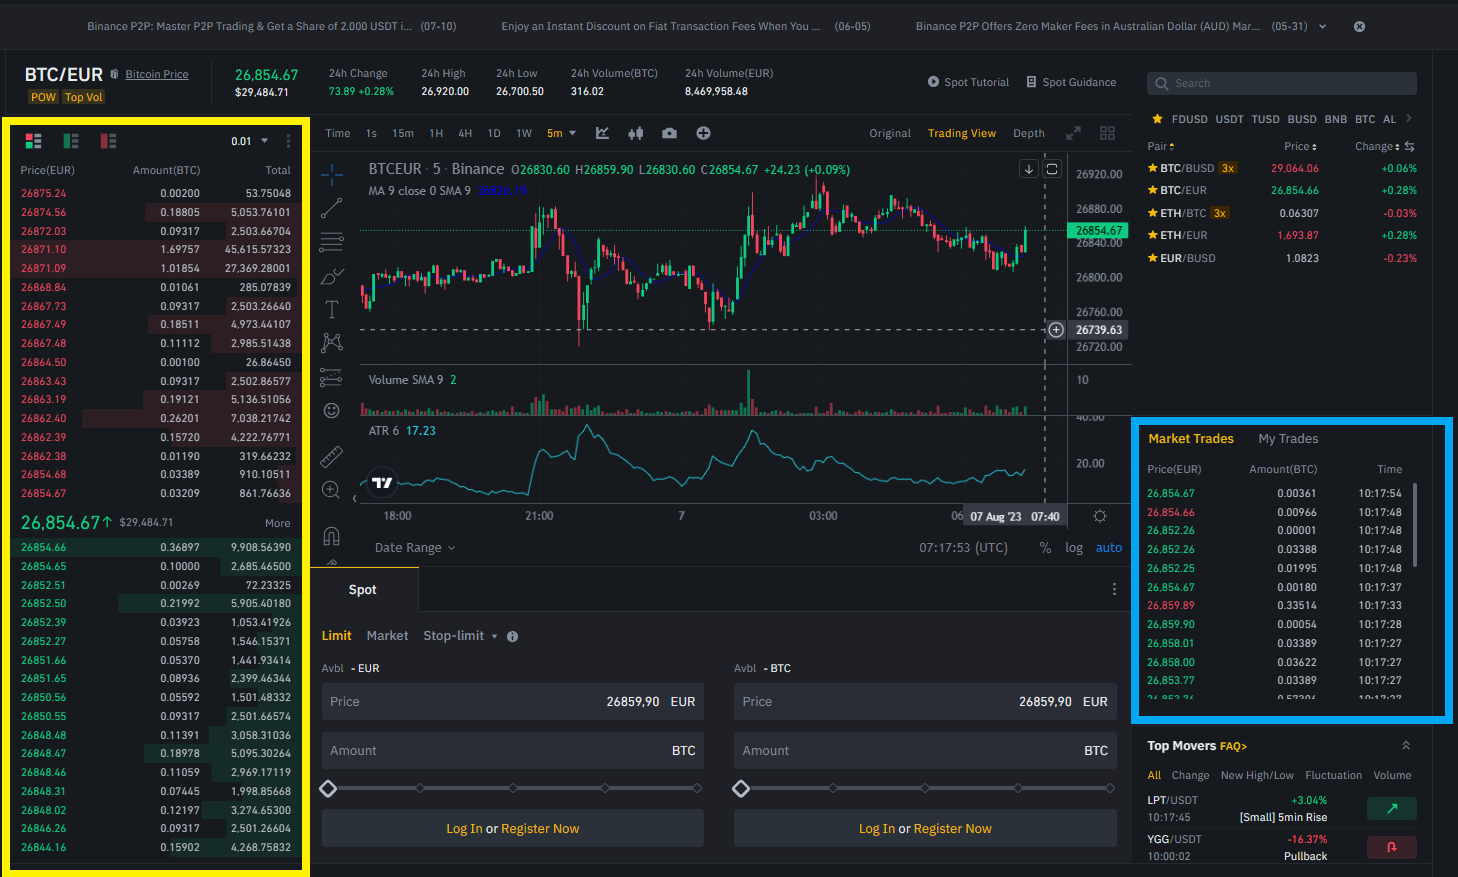

In [3]:
Image(filename = "data/Binance image.png", width = 1400, height = 1400)

$\quad$The entire information needed for the purposes of this project is contained within the yellow and the blue rectangles in the left and right parts of the image. In the middle of the yellow rectangle, with the largest digits, is the current price at which the currency pair **BTCEUR** is being traded - **26,854.67**. This represents the order that is currently being executed. Its color in this case is green, indicating that it is a **Buy order**. The smaller digits below it - the **Price(EUR)** column - are also in green and represent the pending Buy orders (or [limit Buy orders](#8.-Dictionary)). Above it, in red, are the pending **Sell orders** (or [limit Sell orders](#8.-Dictionary)). On the right side of the **Price(EUR)** column is the **Amount(BTC)** column. It shows the quantity of Bitcoin waiting to be traded at the respective price. For example, there is a quantity of 0.00200 **BTC** waiting to be sold (red color) at the price of 26,875.24 **EUR** (the first row of the table). The third column - **Total** - represents the equivalent in **EUR** of the waiting quantity of **BTC** at the respective price. For the first row - **26,875.24 x 0.002 = 53.75048**. This column does not carry any additional useful information, and therefore, we are not interested in it.

$\quad$In the blue square on the right, there is constantly updating information about the executed orders in chronological order. It contains three columns - **Price(EUR)**, **Amount(BTC)**, and **Time**. The first entry in the list is the current order - the one from the yellow square.

$\quad$In summary - the data from the yellow rectangle provides information about the waiting volumes **(Depth of Market)**- i.e. what is being offered on the market at the current moment, what people expect to happen. On the other hand, the data from the blue rectangle represents the market demand - i.e. what is actually happening. The interaction between these two factors and their role in price movement is the focus of this analysis. In slightly more philosophical terms - the relationships between expectations and reality :)


## 4.2 Features

$\quad$Let's take a look at the following dataset.

In [4]:
btc_eur_data = pd.read_csv('data/btc_eur_04_05_08_csv')

In [5]:
btc_eur_data

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499
0,126353548,1691252779255,26761.29,0.00000,0.03837,27.76501,9.83335,6.09676,2.84911,2.49594,25.03644,1.36131,2.18658,4.00745,4.10375
1,126353552,1691252790444,26761.28,0.01466,0.00626,27.53061,9.80582,6.12029,2.81913,2.52531,25.89224,1.63304,2.26127,4.00137,4.11340
2,126353556,1691252805762,26761.30,0.00058,0.01918,27.41062,9.80729,6.12030,2.84695,2.49616,26.70533,1.63642,2.25822,4.00109,4.11417
3,126353563,1691252826844,26761.30,0.00330,0.02026,27.73081,9.80713,6.12030,2.84695,2.49616,26.92322,1.63626,2.25822,4.00109,4.11417
4,126353566,1691252834432,26761.32,0.00110,0.01449,27.79676,9.70238,6.09767,2.88227,2.47785,27.36659,1.35989,2.18784,4.00746,4.10372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,126367863,1691309609745,26806.44,0.00000,0.00224,27.63173,8.35082,5.04773,3.54310,2.69324,28.09510,3.78389,1.86055,3.63981,4.51486
4538,126367865,1691309619231,26806.06,0.00634,0.00000,27.49921,7.41726,5.04773,3.54310,2.69324,28.13694,3.78520,1.84687,3.58895,4.57788
4539,126367867,1691309632311,26806.95,0.00108,0.00780,27.62880,7.41757,5.04773,3.54310,2.69324,28.16669,3.78371,1.85065,3.64905,4.51566
4540,126367868,1691309644763,26805.45,0.00281,0.00000,27.46245,8.21762,5.07151,3.15310,3.11479,28.16860,3.78520,1.84687,3.58895,4.57788


* $\quad$**id** (int) - Unique sequential number of an executed order. Each subsequent order adds one unit to the number of the previous one. This will be used in the analysis to determine the trading speed within a certain period of time.

* $\quad$**time** (int) - The exact moment of order execution reported by the Binance server measured in microseconds. Since it is not possible to extract all the data from the continuous stream of trading, the general strategy for this dataset is to take 'snapshots' of the market state at specific time intervals. For this particular dataset, a 10-second interval was chosen. Ten seconds are sufficient to preserve accurate information about the continuity of the trade flow while also capturing emerging significant movements in both the market depth and order execution. Indeed, the intervals are not exactly ten seconds since the execution of requests to Binance requires some time, sometimes more, sometimes less.

* $\quad$**price** (float) - The price of the currency pair (in this case, **BTCEUR**) at that moment in time. Provides information about how the price is moving over time.

* $\quad$**buy_qty** (float) - The purchased quantity of **BTC** refers to the amount of **EUR** that participants in the trading have given for buying **BTC**. It may be a bit confusing, but it is a common practice - the traded quantities, both for selling and buying, are measured in the values of the base currency of the [currency pair](#8.-Dictionary). At index 1, we have a purchased quantity of 0.01466 **BTC** at a price of **26,761.28**, but in reality, the actual transaction is that a total of 392.32 **EUR** is exchanged for receiving 0.01466 **BTC** - **392.32 / 26,761.28 = 0.014659...** . It is important to clarify that this is the total quantity of the executed purchases for the time interval of 10 seconds from the previous 'snapshot' of the market state.

* $\quad$**sell_qty** (float) - The sold quantity of **BTC** for the interval between the current and the previous 'snapshot'.

These were the features that provide information about the executed orders - what actually happens in the market. The next features provide information about the market depth - what participants expect.

$\quad$Collecting data for the market depth is slightly different. As mentioned above, Binance does not keep information about the prices and volumes of pending orders in previous periods. This means that the numbers in the following columns of the dataset reflect the state of pending orders at a specific moment in time. These numbers represent the cumulative value of pending orders at different price levels relative to the current price. Let's go back to the image above.

$\quad$ In the column below the current price, the prices at which there are pending orders are displayed in descending order. The method **get_order_book()** returns a list with these prices (and their corresponding volumes), and one of the parameters of this function - the limit parameter - determines how many prices downward (or upward) to provide information for. For example, you can take 10 prices. In the image, these will be the prices from the first green price below the current one - **26,856.66**, to the tenth one in order - **26,850.55**. In this dataset, it is chosen to return 500 prices downward and also 500 prices upward. These 500 prices are divided into 5 parts, each containing 100 prices. For example, the column: 

* $\quad$**bids_0_99** (float) - contains the total quantity of pending orders at 100 prices below the current price.

* $\quad$**bids_100_199** (float) - contains the total quantity of pending orders between the 100th and 199th (inclusive) prices.


The same applies to the columns **asks_0_99**, **asks_100_199** and so on...

$\quad$**Important clarification!** These price levels within the price ranges are relative to the current price and move along with it. Furthermore, due to the dynamic nature of [events in the order book](#8.-Dictionary), a certain price (along with its corresponding volume) may disappear, or the volume may change, and so on. This happens in part because a significant portion of traders engage in automated trading systems, known as cryptocurrency bots. That is why - according to the project author's understanding - it doesn't make sense to record these constant price changes in the order book in the dataset. What really interests us are the sums of the waiting volumes above and below the current price because they provide insights into the participants' expectations. Despite the dynamic nature of events in the order book, the volume values in large price ranges relative to the current price will remain relatively stable. These aspects will be shown in the subsequent analysis.

## 5. Analysis

$\quad$Let's display the dataset again.

In [6]:
btc_eur_data.head()

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499
0,126353548,1691252779255,26761.29,0.00000,0.03837,27.76501,9.83335,6.09676,2.84911,2.49594,25.03644,1.36131,2.18658,4.00745,4.10375
1,126353552,1691252790444,26761.28,0.01466,0.00626,27.53061,9.80582,6.12029,2.81913,2.52531,25.89224,1.63304,2.26127,4.00137,4.11340
2,126353556,1691252805762,26761.30,0.00058,0.01918,27.41062,9.80729,6.12030,2.84695,2.49616,26.70533,1.63642,2.25822,4.00109,4.11417
3,126353563,1691252826844,26761.30,0.00330,0.02026,27.73081,9.80713,6.12030,2.84695,2.49616,26.92322,1.63626,2.25822,4.00109,4.11417
4,126353566,1691252834432,26761.32,0.00110,0.01449,27.79676,9.70238,6.09767,2.88227,2.47785,27.36659,1.35989,2.18784,4.00746,4.10372


In [7]:
btc_eur_data.dtypes

id                int64
time              int64
price           float64
buy_qty         float64
sell_qty        float64
bids_0_99       float64
bids_100_199    float64
bids_200_299    float64
bids_300_399    float64
bids_400_499    float64
asks_0_99       float64
asks_100_199    float64
asks_200_299    float64
asks_300_399    float64
asks_400_499    float64
dtype: object

Transforming the **"time"** column into a readable format.

In [8]:
btc_eur_data.time = btc_eur_data.time.apply(lambda x: pd.to_datetime(x, unit='ms'))

In [9]:
btc_eur_data.head(5)

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499
0,126353548,2023-08-05 16:26:19.255,26761.29,0.00000,0.03837,27.76501,9.83335,6.09676,2.84911,2.49594,25.03644,1.36131,2.18658,4.00745,4.10375
1,126353552,2023-08-05 16:26:30.444,26761.28,0.01466,0.00626,27.53061,9.80582,6.12029,2.81913,2.52531,25.89224,1.63304,2.26127,4.00137,4.11340
2,126353556,2023-08-05 16:26:45.762,26761.30,0.00058,0.01918,27.41062,9.80729,6.12030,2.84695,2.49616,26.70533,1.63642,2.25822,4.00109,4.11417
3,126353563,2023-08-05 16:27:06.844,26761.30,0.00330,0.02026,27.73081,9.80713,6.12030,2.84695,2.49616,26.92322,1.63626,2.25822,4.00109,4.11417
4,126353566,2023-08-05 16:27:14.432,26761.32,0.00110,0.01449,27.79676,9.70238,6.09767,2.88227,2.47785,27.36659,1.35989,2.18784,4.00746,4.10372


In [10]:
# Remove microseconds 
btc_eur_data.time =btc_eur_data.time.dt.strftime('%Y-%m-%d %H:%M:%S')

In [11]:
btc_eur_data.head(10)

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499
0,126353548,2023-08-05 16:26:19,26761.29,0.00000,0.03837,27.76501,9.83335,6.09676,2.84911,2.49594,25.03644,1.36131,2.18658,4.00745,4.10375
1,126353552,2023-08-05 16:26:30,26761.28,0.01466,0.00626,27.53061,9.80582,6.12029,2.81913,2.52531,25.89224,1.63304,2.26127,4.00137,4.11340
2,126353556,2023-08-05 16:26:45,26761.30,0.00058,0.01918,27.41062,9.80729,6.12030,2.84695,2.49616,26.70533,1.63642,2.25822,4.00109,4.11417
3,126353563,2023-08-05 16:27:06,26761.30,0.00330,0.02026,27.73081,9.80713,6.12030,2.84695,2.49616,26.92322,1.63626,2.25822,4.00109,4.11417
4,126353566,2023-08-05 16:27:14,26761.32,0.00110,0.01449,27.79676,9.70238,6.09767,2.88227,2.47785,27.36659,1.35989,2.18784,4.00746,4.10372
5,126353570,2023-08-05 16:27:29,26761.31,0.01729,0.01454,27.79044,9.80713,6.12030,2.84695,2.49616,28.15576,1.35989,2.18784,4.00746,4.10372
6,126353572,2023-08-05 16:27:36,26761.31,0.00262,0.01047,27.92449,9.81282,5.97955,2.89053,2.47205,28.70925,1.36115,2.18658,4.00745,4.10375
7,126353574,2023-08-05 16:27:45,26761.32,0.00000,0.01147,27.84186,9.80713,6.12030,2.84695,2.49616,28.86114,1.35989,2.18784,4.00746,4.10372
8,126353575,2023-08-05 16:27:55,26761.32,0.00000,0.02228,27.82994,9.80713,6.12030,2.84695,2.49616,27.97832,1.35989,2.18784,4.00746,4.10372
9,126353577,2023-08-05 16:28:13,26761.32,0.00262,0.00000,27.82732,9.80698,6.12030,2.84695,2.49616,28.21350,1.63273,2.26127,4.00137,4.11340


$\quad$Here arises an issue with the values in this column. Let's display the differences in periods for the first ten rows.

In [12]:
print_time_diferences(btc_eur_data.time)

0 2023-08-05 16:26:19
1 2023-08-05 16:26:30 0 days 00:00:11
2 2023-08-05 16:26:45 0 days 00:00:15
3 2023-08-05 16:27:06 0 days 00:00:21
4 2023-08-05 16:27:14 0 days 00:00:08
5 2023-08-05 16:27:29 0 days 00:00:15
6 2023-08-05 16:27:36 0 days 00:00:07
7 2023-08-05 16:27:45 0 days 00:00:09
8 2023-08-05 16:27:55 0 days 00:00:10
9 2023-08-05 16:28:13 0 days 00:00:18


$\quad$As seen, the differences are not uniform. The idea behind collecting the data was to make requests to the Binance server at regular intervals of 10 seconds. However, the response from the server takes time to process the request. This is one reason for this result. Another reason lies in the data collection logic - the strategy was that if there is no change in the **Id** compared to the last executed order within the elapsed ten seconds, no data should be written to the **.csv** file, as there is practically nothing to record.

$\quad$Now let's focus on the dataset itself.


## 5.1 Dataset btc_eur_data overview

$\quad$Let's take a general overview of this dataset.

In [13]:
print(overview(btc_eur_data))

Start time: 2023-08-05 16:26:19
End time: 2023-08-06 08:14:14
Time duration: 0 days 15:47:55 hours
Time duration in minutes: 948
High price: 26834.82
Low price: 26738.52
Average price: 26786.67
Maximum price difference: 96.30
Maximum price change relative to the arithmetic mean price: 0.36%
Total transactions count: 14324
Average number of transactions per minute: 15.11
Total buy quantity: 50.86805 BTC
Total sell quantity: 67.90567 BTC
Total traded quantity: 118.77372 BTC
Average traded quantity per transaction: 0.008292 BTC


$\quad$At first glance, it can be seen that this dataset captures a not very active trading period. There is a small difference between the lowest and highest price values, which suggests a 'flat' chart without significant price jumps. On the other hand, we have low price change values for the entire dataset period, as well as low values for the average number of transactions per minute and the overall traded quantity volume per minute. Let's observe the price movement.

## 5.2 Detail Analysis

## 5.2.1 Demand versus Price

$\quad$We start with the 'first half of the equation' - the demand. As mentioned above, the demand within a certain time period can be inferred from the quantities traded during that period - the larger the quantity, the more active the market is. The balance of traded quantities, in turn, provides insight into what is specifically being sought after. If, in a given time period, more **BTC** is purchased than sold, it indicates that participants are moving towards acquiring **BTC**. The simple logic in such a case suggests that its price should rise. Let's see if this holds true.

## 5.2.2 Price versus Time

$\quad$Let's start with the core aspect - price movement. From the review above, we concluded that the chart should be 'flat'.

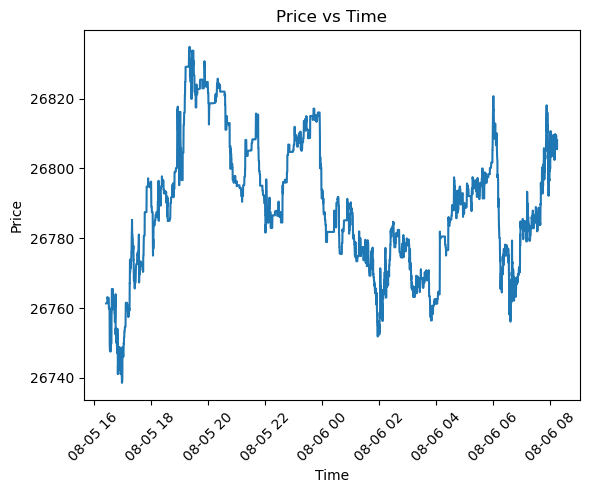

In [14]:
plot_feature_over_time(btc_eur_data, 'price')

$\quad$This chart doesn't look 'flat' because it uses the lower and upper bounds of the prices. Let's change the scale - let's set the y-axis limits to be 26000 and 27000.

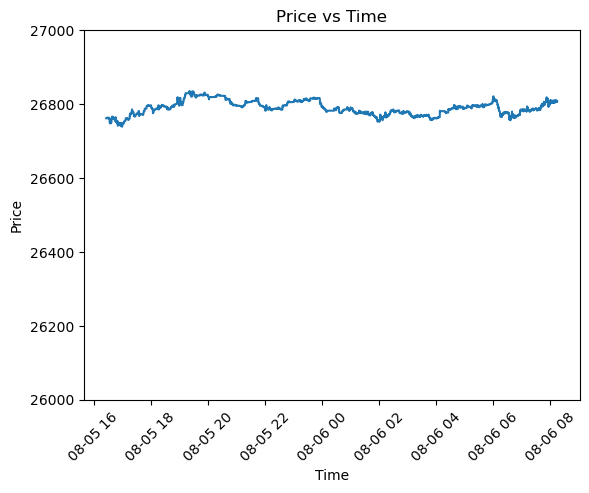

In [15]:
plot_feature_over_time(btc_eur_data, 'price', ylim = (26000, 27000))

$\quad$Let's see what the histogram of prices will reveal.

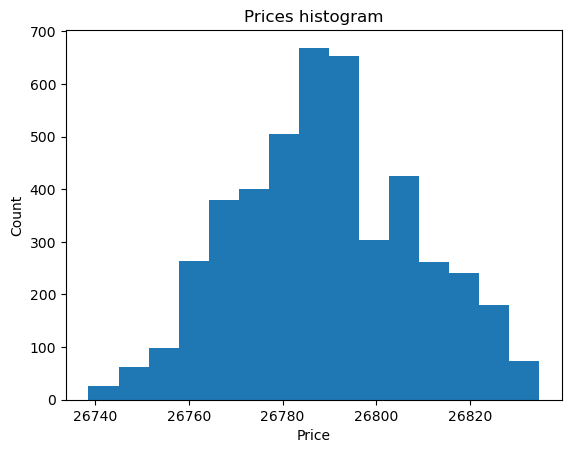

In [16]:
plt.hist(btc_eur_data.price, bins = 15)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Prices histogram')
plt.show()

In [17]:
mean = btc_eur_data.price.mean()
standart_deviation = btc_eur_data.price.std()
ratio =  standart_deviation/mean

In [18]:
mean, standart_deviation, f'{ratio*100:.2f}%'

(26789.323734037942, 19.174190694383014, '0.07%')

$\quad$The histogram of prices looks exactly like a normal distribution. This makes sense because the price, over a long period of time, moves within very narrow boundaries, meaning it frequently occupies a tight range of values and oscillates around them. As seen in this case, these values are approximately between **26,780** and **26,800**, and they have occurred around 650 times over a period of 15 hours and 48 minutes. Notably, the minimum and maximum values are at the lowest frequency. From here, we can assume that the standard distribution of the price histogram for a given time period indicates that the price has oscillated relatively evenly within a certain range of values. On the other hand, we have a very small standard deviation here - around 0.07% compared to the mean value, indicating a small average amplitude. We can conclude that the combination of these two factors - the presence of a standard distribution and a small standard deviation value - indicates weak market activity. It is important to note that if the standard deviation has a much higher value, then even though the distribution is standard, market activity will be high within the given bounds. Below, we'll also examine another dataset with greater price movement, where the histogram of prices will appear differently.

$\quad$As seen from the graphs, there isn't much market activity during this time period. We need a few more graphs to examine the details further. Let's examine the relationship between transactions counts and price movement.

## 5.2.3 Number of Тransactions versus Price

$\quad$Count of transactions over a period of time can be easily determined using the **Id** column, by calculating the difference in **Id** values. For example:

In [19]:
btc_eur_data.head(2)

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499
0,126353548,2023-08-05 16:26:19,26761.29,0.00000,0.03837,27.76501,9.83335,6.09676,2.84911,2.49594,25.03644,1.36131,2.18658,4.00745,4.10375
1,126353552,2023-08-05 16:26:30,26761.28,0.01466,0.00626,27.53061,9.80582,6.12029,2.81913,2.52531,25.89224,1.63304,2.26127,4.00137,4.11340


In [20]:
btc_eur_data.id[1] - btc_eur_data.id[0]

4

$\quad$In the first period of ten seconds, four transactions were executed. Similarly, we will now find the number of transactions for each 10-second period across the entire dataset using the same approach.

In [21]:
# Creating an np.array() with the differences in the number of transactions.
transactions_diffs = get_transaction_counts_diffs(btc_eur_data.id.values)

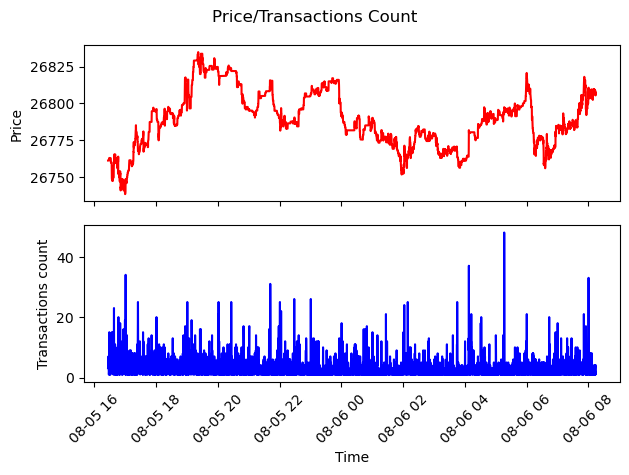

In [22]:
messages = {
    'title': 'Price/Transactions Count',
    'top_y_label': 'Price',
    'bottom_y_label': 'Transactions count',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, transactions_diffs, btc_eur_data.time.values, 
                                   0, len(btc_eur_data.price.values), messages)

$\quad$It's difficult to say definitively whether there is or isn't a correlation. It's important to note that during moments of high transaction speed, the price can experience 'jumps' both upwards and downwards. This is because the sheer number of transactions doesn't provide information about the nature of the transactions - whether they are **Buy** or **Sell**, or some combination of the two. Let's investigate the same correlation but in a shorter period.

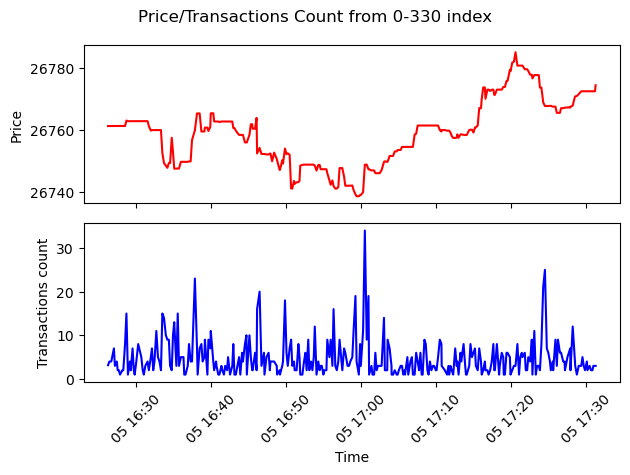

In [23]:
messages = {
    'title': 'Price/Transactions Count from 0-330 index',
    'top_y_label': 'Price',
    'bottom_y_label': 'Transactions count',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, transactions_diffs, btc_eur_data.time.values, 0, 330,messages)

$\quad$This graph depicts the market activity from the beginning of the dataset until approximately one hour later. Similar to before, it's also difficult to determine whether there is correlation. Besides visual analysis, let's test this numerically as well.

In [24]:
np.corrcoef(btc_eur_data.price.values, transactions_diffs)

array([[1.        , 0.00433446],
       [0.00433446, 1.        ]])

$\quad$This correlation matrix applies to the entire dataset. The extremely low correlation value of 0.00433446 indicates that there is practically no **linear** correlation between the transaction frequency and the price movement. There are at least two possible interpretations of this:

 1. There is a peculiarity in order execution on Binance - during execution, a pending order can be divided into several smaller ones, which will increase the count of executed orders without necessarily indicating an increase in trading activity.
 
 2. According to the main hypothesis of this project, high market activity does not necessarily imply significant price increases or decreases. Other conditions are necessary for such price movements to occur. On one hand, there must be high demand in a certain direction, either **Bid** or **Ask**, and on the other hand, there must be reduced supply in the same direction at the same moment.
 
 In conclusion, the absence of correlation between the count of transactions and price movements does not confirm the main hypothesis, but it also does not reject it.
 

## 5.2.4 Transaction Count - Traded Quantities relation

$\quad$Let's see the correlation between the number of transactions and the trading volumes. We need to calculate the sum of **Buy** and **Sell** transactions for each row of the dataset.

In [25]:
total_quantities = btc_eur_data['buy_qty'] + btc_eur_data['sell_qty']

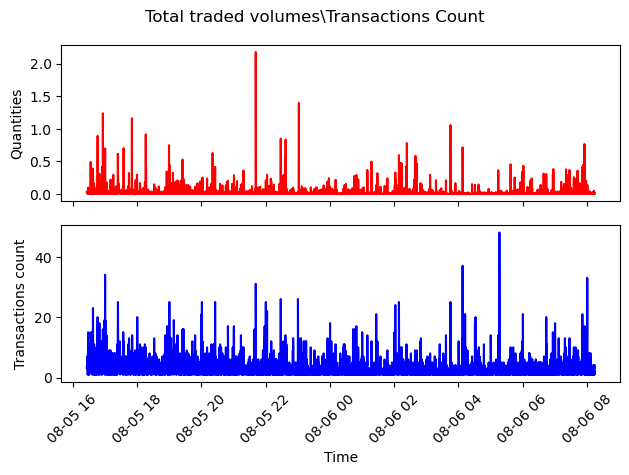

In [26]:
messages = {
    'title': 'Total traded volumes\Transactions Count',
    'top_y_label': 'Quantities',
    'bottom_y_label': 'Transactions count',
    'x_label': 'Time'
}
plot_one_above_another(total_quantities, transactions_diffs, btc_eur_data.time.values, 0, len(total_quantities),messages)

$\quad$To a large extent, the visualizations appear similar. Let's also examine the correlation coefficient.

In [27]:
np.corrcoef(total_quantities, transactions_diffs)

array([[1.       , 0.5782629],
       [0.5782629, 1.       ]])

$\quad$A correlation of 0.57 is typically evaluated as a moderate positive correlation, which means that there is a moderate positive relationship between the number of transactions and the trading volumes during a given period. It makes sense - if we go back to the image above, we can see that there are varying quantities against the prices of the waiting orders. If the quantities were the same, then the correlation would be a perfect positive one. We can conclude that the number of transactions can be used as a moderate indicator of market activity during a certain period of time.

## 5.2.5 Price versus Traded Quantities

$\quad$Let's explore what the relationship between the traded volumes and the price reveals. Initially, we will examine the traded volumes for **Bid** and **Ask** separately in relation to the price.

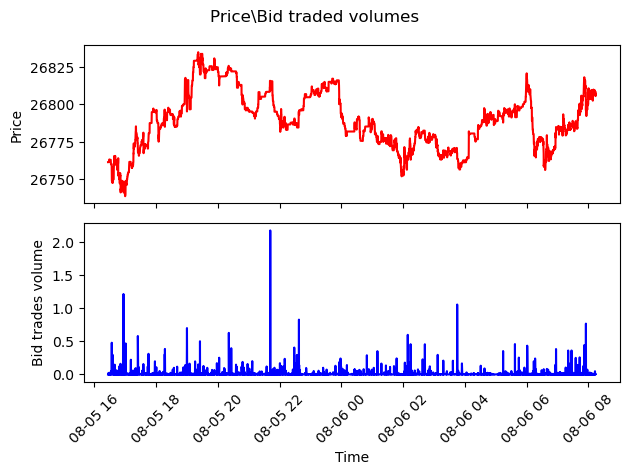

In [28]:
messages = {
    'title': 'Price\Bid traded volumes',
    'top_y_label': 'Price',
    'bottom_y_label': 'Bid trades volume',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, btc_eur_data.buy_qty.values, btc_eur_data.time.values, 0, len(total_quantities),messages)

In [29]:
np.corrcoef(btc_eur_data.price.values, btc_eur_data.buy_qty.values)

array([[ 1.        , -0.02198497],
       [-0.02198497,  1.        ]])

$\quad$No correlation. Let's do the same for the sold quantities.

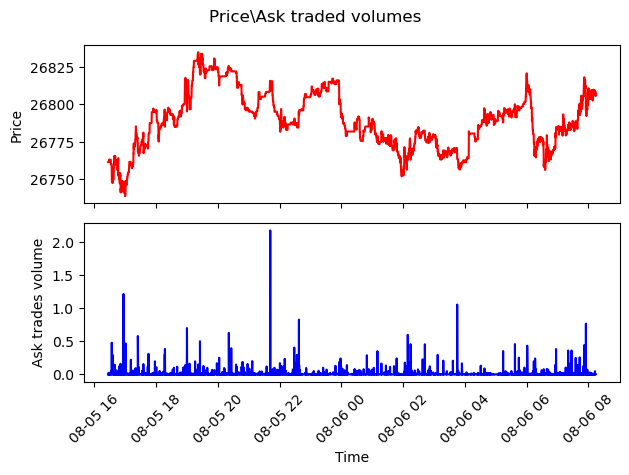

In [30]:
messages = {
    'title': 'Price\Ask traded volumes',
    'top_y_label': 'Price',
    'bottom_y_label': 'Ask trades volume',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, btc_eur_data.buy_qty.values, btc_eur_data.time.values, 0, len(total_quantities),messages)

In [31]:
np.corrcoef(btc_eur_data.price.values, btc_eur_data.sell_qty.values)

array([[1.        , 0.01181069],
       [0.01181069, 1.        ]])

$\quad$Also no correlation.

$\quad$The explanation is as follows. In a given period of time, orders are executed in both directions - **Bid** and **Ask**, which means that the traded quantities can balance each other out, resulting in no or weak price movement. On its own, a large volume of executed orders in the **Ask** direction cannot increase the price if there is also a large volume of executed orders in the **Bid** direction at the same time. The more accurate strategy is to consider both aspects together. We can achieve this by taking the difference between the two. For this, we will use the formula:

$$D_{t} = A_{t} - B_{t} \quad\quad\quad\quad(3)$$

where:

* $A_{t}$ is the sum of all executed Ask orders for the given time period,
* $B_{t}$ is the sum of all executed Bid orders for the given time period.

If there is a higher volume of sales (**Ask** direction) during the given time period, then $D_{t}$ will be a positive number, and the price should increase. In the opposite case, if $D_{t}$ is a negative number, the price should decrease. In other words, the sign of the difference $D_{t}$ aligns with the direction of the price. Therefore, if any correlation between trading volumes and price exists, we should expect it to be positive.


In [32]:
executed_volumes_diff = btc_eur_data.sell_qty.values - btc_eur_data.buy_qty.values

In [33]:
executed_volumes_diff

array([ 0.03837, -0.0084 ,  0.0186 , ...,  0.00672, -0.00281,  0.01659])

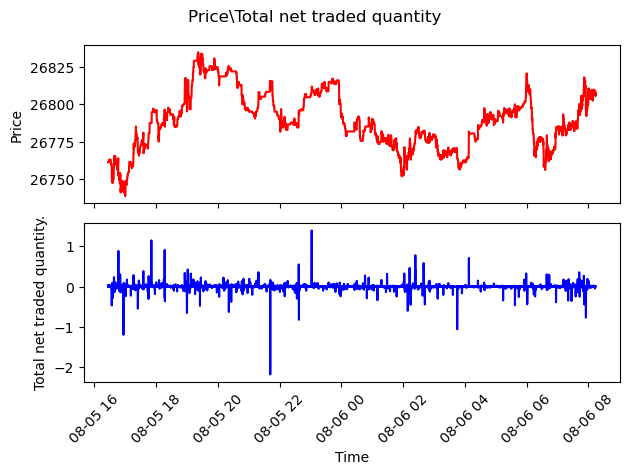

In [34]:
messages = {
    'title': 'Price\Total net traded quantity',
    'top_y_label': 'Price',
    'bottom_y_label': 'Total net traded quantity.',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, executed_volumes_diff, btc_eur_data.time.values, 0, len(executed_volumes_diff),messages)

In [35]:
np.corrcoef(btc_eur_data.price.values, executed_volumes_diff)

array([[1.        , 0.02488204],
       [0.02488204, 1.        ]])

$\quad$No correlation, but still - as we expected, the number is positive.


$\quad$However, another interesting observation emerges here. If we take the difference in trading volumes for the entire dataset period, we will see that it is positive, indicating an overall dominance of sales.

In [36]:
np.sum(executed_volumes_diff)

17.03761999999999

$\quad$At the same time, if we take the initial and final price for the entire period, we will see that it has increased.

In [37]:
print(f'Start price: {btc_eur_data.price.values[0]}\nEnd price: {btc_eur_data.price.values[-1]}')

Start price: 26761.29
End price: 26808.0


$\quad$The question that arises here is: is it possible for the degree of correlation to depend on the size of the period? Let's recall that the information in the dataset was collected at 10-second intervals. This is a sufficiently small interval, implying a high degree of randomness. Why? As mentioned in the introduction, Binance's server executes orders in chronological order, and these orders are placed by participants independently of each other. In such a case, there's no logic to assume any orderliness. However, as the law of large numbers dictates, for a larger time interval, values should average out, and trends might start to form.

##### <center>Hypothesis<center>

$\quad$*The correlation coefficient between the total net executed order quantity and price movement is directly proportional to the size of the time period over which both variables are considered.*

The larger the period, the larger the coefficient should be. However, at the same time, the value of the coefficient itself should not be very large, as according to the main hypothesis of this analysis, price movement also depends on other factors. 

$\quad$To test this hypothesis, we need to perform various breakdowns of time intervals from the dataset. We will apply a function that sequentially groups the intervals into ranges of 1, 2, 3, 4...60 minutes, perform the respective volume calculations, and record the price value at the beginning and end of each interval. Since the intervals are not exactly 10 seconds, we are grouping by index. In other words, we will consider a group of 6 rows as a one-minute interval. In the new dataset, we will use only the necessary data. Here's how it looks.

In [38]:
btc_eur_1_minute = group_by_time_intervals(btc_eur_data, time_interval = 1)

In [39]:
btc_eur_1_minute.head()

,id,time,price,buy_qty,sell_qty,diff,bids_0_99,asks_0_99
0,126353570,2023-08-05 16:27:29,26761.31,0.01964,0.09856,0.07892,27.646762,26.384764
1,126353587,2023-08-05 16:28:35,26761.32,0.00696,0.04422,0.03726,27.838792,28.454748
2,126353618,2023-08-05 16:29:45,26762.87,0.04652,0.12465,0.07813,27.753804,28.855604
3,126353639,2023-08-05 16:31:05,26762.87,0.01534,0.07548,0.06014,27.607126,26.199176
4,126353662,2023-08-05 16:32:20,26759.98,0.01594,0.06263,0.04669,27.515686,26.379888


$\quad$To verify its correctness, each value in the **'Id'** column corresponds to every sixth value from the original btc_eur_data dataset.

In [40]:
assert btc_eur_1_minute.id[0] == btc_eur_data.id[5] 

In [41]:
assert btc_eur_1_minute.id[1] == btc_eur_data.id[11]

In [42]:
assert btc_eur_1_minute.id[2] == btc_eur_data.id[17]

$\quad$The next function will create such a dataset sequentially for intervals from 1 minute to 60 minutes and will calculate the correlation coefficient between the **'price'** and **'diff'** columns (the **'diff'** column represents the difference between **'total_asks'** and **'total_bids'**).

In [43]:
correlations = calc_correlations_by_time_interval(btc_eur_data,'corr_coeff', range_intervals_in_minutes= [1,60])

In [44]:
correlations.head()

,correlation_coefficient
time_interval_in_minutes,
1,0.038649
2,0.041205
3,0.090117
4,0.134641
5,0.119369


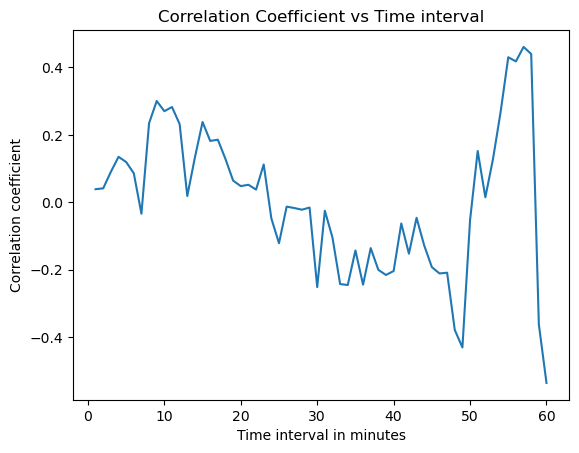

In [45]:
plot_correlations(correlations, title = 'Correlation Coefficient vs Time interval')

$\quad$Finding a predominant trend in this graph is difficult. It appears more chaotic rather than showing a clear trend. There are several possible reasons for this:
1. Strong dependence of the coefficient's accuracy on the size of the data it is calculated upon. The fewer data points are used, the more its accuracy decreases due to the higher likelihood of random variations and noise. For example, the size of the original dataset we are working with here is 4542 rows. When we break it down into one-minute intervals (in our case, by grouping it into sets of six indexes each), its size becomes 757 rows. Grouping it into two-minute intervals further reduces it to 378 аnd the thirty-minute one has only 25. In this case, obviously the sizes of the input data are disproportionate.

In [46]:
4542 // 6, 4542// (2 * 6), 4542// (30* 6)

(757, 378, 25)

2. As we noted above, market activity for the entire period of the studied dataset is weak. The price moves within very narrow boundaries. This often leads to the occurrence of random deviations caused by the execution process of orders from the Binance server.

3. The impact of other factors on price movement - market depth, etc.

$\quad$However, there is a possibility for the level of accuracy to become balanced, and then we can observe what happens. For this purpose, we will take equal-sized divisions for time intervals. In order to maintain a sufficiently large data size, we will consider a four-minute interval as the unit size of the divisions.

In [47]:
group_by_time_intervals(btc_eur_data, time_interval = 4).shape

(189, 8)

In [48]:
correlations_to_189 = calc_correlations_by_time_interval(btc_eur_data,'corr_coeff', range_intervals_in_minutes= [1,4], dataset_size = 189)

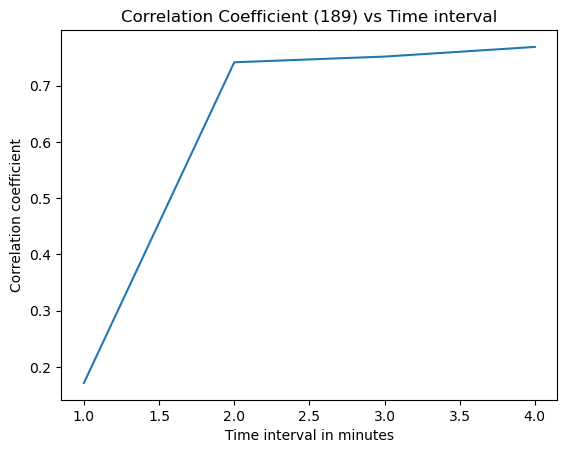

In [49]:
plot_correlations(correlations_to_189, title = 'Correlation Coefficient (189) vs Time interval')

$\quad$Here, with the level of accuracy equalized, an increase in the correlation coefficient is noticeable, even unusually high. We have levels above 0.7, unlike the calculations above where the maximum coefficient for the intervals between 1 and 4 minute was below 0.2. This is most likely due to the smaller size of the input data, which implies higher inaccuracy. Conclusion: despite the upward trend, there are no substantial grounds for accepting the hypothesis. Due to the lack of data, there are also no grounds for rejecting it.

$\quad$With this analysis, the examination of the relationship between demand and price concludes. Overall, there are no indications of correlation between the two; however, it should be noted that data collection for this dataset coincided with a period of low market activity. The relationship between the two variables will be re-examined below using a different dataset that fortunately captured a time of strong market activity and significant price movements. At this stage, the conclusion of a lack of correlation is not very certain and is not contradictory to the main hypothesis.

$\quad$Now, let's turn our attention to the dynamics of supply and its relationship to price movement.

## 5.3 Supply versus Price

$\quad$Here, in the 'second part of the equation,' we will examine what people 'want,' what they 'expect' to happen in the market, or in other words - the supply or the Depth of Market.

$\quad$First we need to recall that the corresponding columns - **bids_0_99**, **bids_100_199**, and so on, contain the sums of pending orders at one hundred price intervals above or below the current price (for reference, refer to the image above). The idea behind collecting the data in this way is as follows: due to the chaos of participants' actions, the order book at any given moment resembles a 'boiling pot' - there is a constant placing and canceling of orders, order execution, and so on (again, [this](https://www.binance.com/bg/trade/BTC_EUR?theme=dark&type=spot) can be observed in real-time). The project's author sees no purpose in recording this chaos in detail. Instead, following the law of large numbers, useful information can only be extracted from this chaos if it is averaged. The assumption is that within a sufficiently large price range (relative to the current price), the pending quantities should remain stable as a value for a given period of time, despite the continuous placing and canceling of orders. The chosen range is 500 prices above and 500 prices below. Each of these two intervals is divided into five parts of 100 intervals each to extract more detailed information about short-term (range 0_99), medium-term (range 100_199 and 200_299), and long-term (range 300_399 and 400_499) expectations of market participants.

$\quad$As already mentioned, these different price ranges are 500 prices above and 500 prices below the current price, which means they will shift up or down along with it. Another approach for gathering information about pending volumes is to take the current price at a given moment and establish fixed boundaries above and below it. For example, taking the price of **25,000**, we calculate the sums between **26,000** and **24,000**, which is 1000 above and 1000 below. However, this approach would undermine the possibility of analysis because as the price approaches one of the two boundaries - let's say it goes up towards **26,000** and reaches **25,900** - there will be fewer pending prices above it and therefore, smaller volumes. At the same time, there will be more pending prices below it, resulting in larger volumes. This way, the movement of the price itself would create an inaccurate picture of people's expectations.

$\quad$The next two graphs show the quantities of pending orders in different ranges relative to the current price at a given moment in time.

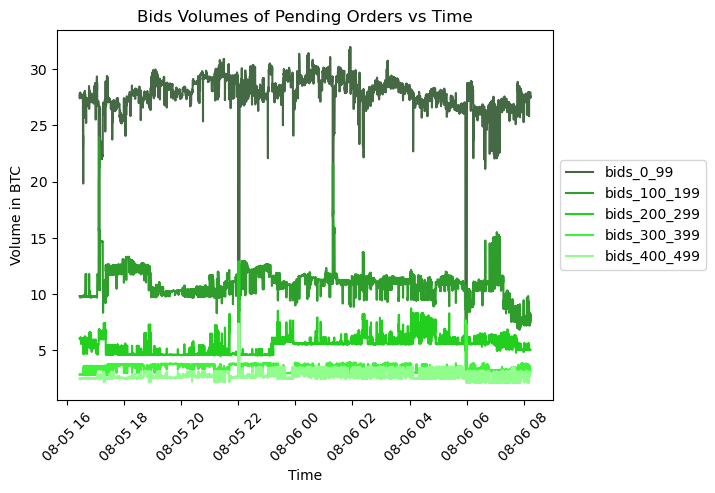

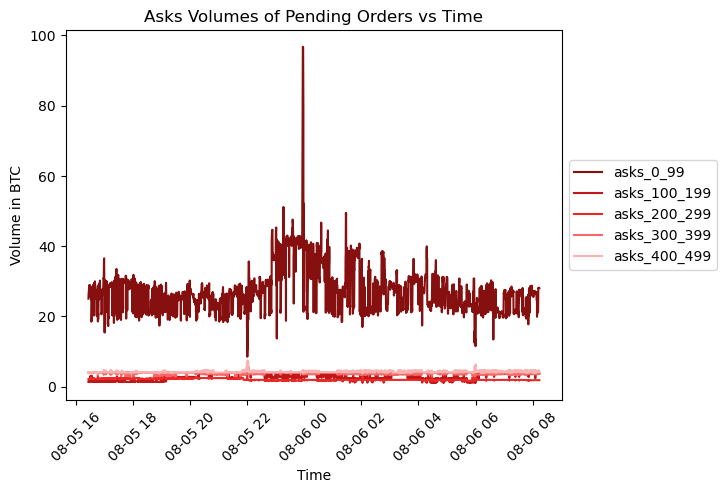

In [50]:
plot_volumes(btc_eur_data)

$\quad$It can be observed that in both directions of pending orders, the largest quantities are in the nearest range to the current price - the range 0_99. This implies that the overall disposition of traders is to trade in short-term intervals. How large is this interval? The author didn't realize in time that he needed to gather data on the price boundaries of the intervals. Therefore, it became necessary to create a new dataset containing this information.

In [51]:
range_data = pd.read_csv('data/range_for_illustration_csv')

In [52]:
range_data.time = range_data.time.apply(lambda x: pd.to_datetime(x, unit='ms'))

In [53]:
range_data.time =range_data.time.dt.strftime('%Y-%m-%d %H:%M:%S')

In [54]:
print(overview(range_data))

Start time: 2023-08-12 07:17:07
End time: 2023-08-12 12:09:31
Time duration: 0 days 04:52:24 hours
Time duration in minutes: 293
High price: 27249.4
Low price: 27200.87
Average price: 27225.135000000002
Maximum price difference: 48.53
Maximum price change relative to the arithmetic mean price: 0.18%
Total transactions count: 5692
Average number of transactions per minute: 19.43
Total buy quantity: 17.07180 BTC
Total sell quantity: 29.37418 BTC
Total traded quantity: 46.44598 BTC
Average traded quantity per transaction: 0.008160 BTC


In [55]:
range_data = range_data[['time', 'price', 'bottom_80_99', 'top_80_99']]

In [56]:
range_data.head()

,time,price,bottom_80_99,top_80_99
0,2023-08-12 07:17:07,27243.74,27110.00,27450.00
1,2023-08-12 07:17:41,27243.80,27108.69,27440.00
2,2023-08-12 07:18:01,27244.24,27103.89,27450.00
3,2023-08-12 07:18:36,27244.24,27106.49,27440.05
4,2023-08-12 07:19:13,27242.08,27106.48,27440.00


In [57]:
average_distance = (range_data.top_80_99 - range_data.bottom_80_99).mean()

In [58]:
arithmetic_mean_price = (range_data.price.max() + range_data.price.min())/2

In [59]:
average_distance, arithmetic_mean_price

(320.8946139359693, 27225.135000000002)

In [60]:
ratio = (average_distance/arithmetic_mean_price)*100

In [61]:
f'{ratio:.2f}%'

'1.18%'

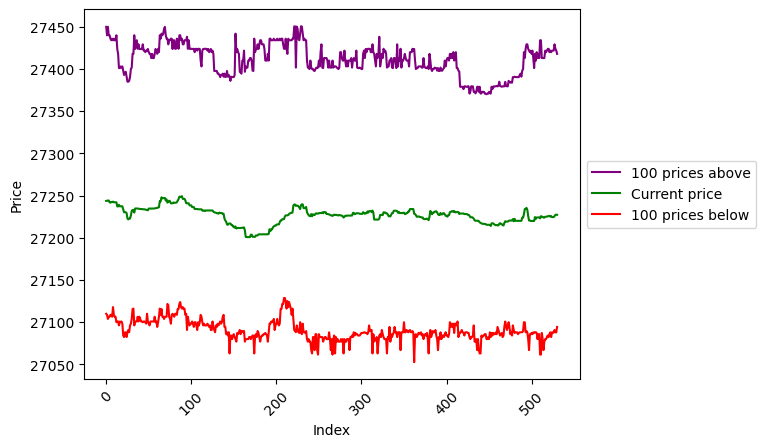

In [62]:
plot_ranges(range_data)

$\quad$The above graph is merely an illustration of how the upper and lower boundaries of 100 prices look. Here, the price graph is also 'flat'. The upper and lower bounds are located approximately 1.18 % above and below the current price. Since the largest sums are in this range, if the volume of pending orders influences the price movement, then we should expect that the volumes in this closest range to the current price will have the greatest impact. Therefore, in the analysis, we will focus solely on it.

## 5.3.1 Waiting Quantities versus Price

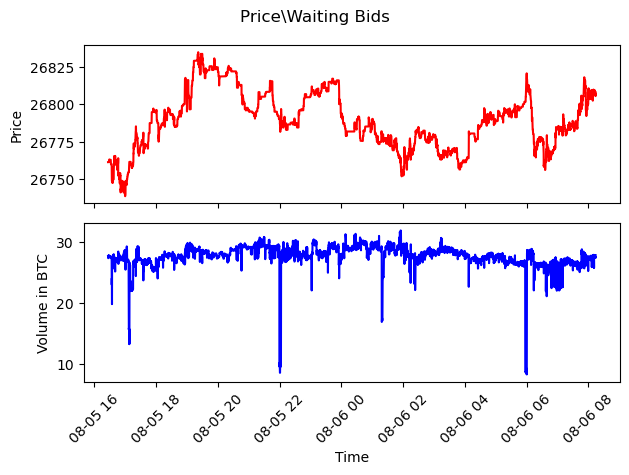

In [63]:
messages = {
    'title': 'Price\Waiting Bids',
    'top_y_label': 'Price',
    'bottom_y_label': 'Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, btc_eur_data.bids_0_99.values, btc_eur_data.time.values, 0, len(btc_eur_data.time.values),messages)

$\quad$We have several distinct decreases in the volume of waiting **Bid** orders, and they seem to coincide with larger price declines. This makes sense because according to the main hypothesis, when the supply decreases, the value should increase. It might appear a bit confusing at first glance, but we need to consider that since the graph is for **Bid** orders, a decrease in the price of the **BTCEUR** pair actually signifies an increase in the value of **EUR**. Therefore, a decrease in the waiting **Bid** volumes should lead to a decrease in price. Let's see what the correlation coefficient will reveal.

In [64]:
np.corrcoef(btc_eur_data.price.values, btc_eur_data.bids_0_99.values)

array([[1.        , 0.12142983],
       [0.12142983, 1.        ]])

$\quad$In practice, there is no correlation, but the value is still positive, indicating a coincidence in the direction of change of the investigated variables.

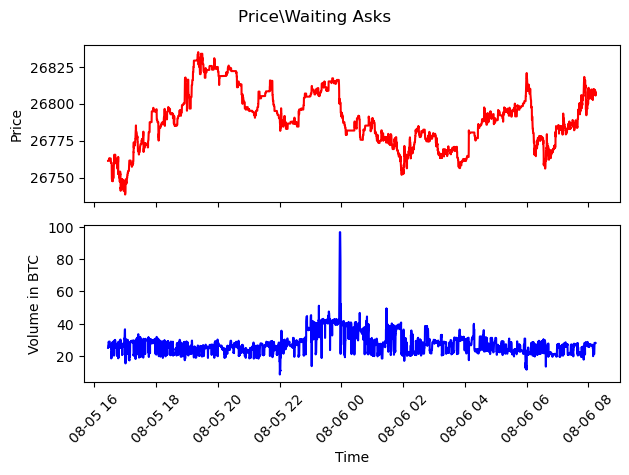

In [65]:
messages = {
    'title': 'Price\Waiting Asks',
    'top_y_label': 'Price',
    'bottom_y_label': 'Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, btc_eur_data.asks_0_99.values, btc_eur_data.time.values, 0, len(btc_eur_data.time.values),messages)

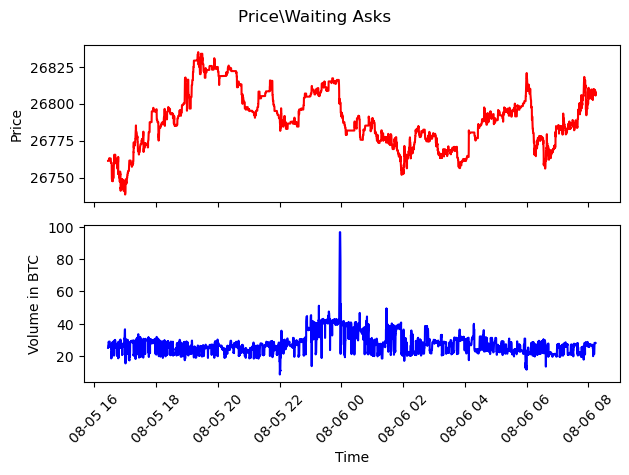

In [66]:
messages = {
    'title': 'Price\Waiting Asks',
    'top_y_label': 'Price',
    'bottom_y_label': 'Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.price.values, btc_eur_data.asks_0_99.values, btc_eur_data.time.values, 0, len(btc_eur_data.time.values),messages)

In [67]:
np.corrcoef(btc_eur_data.price.values, btc_eur_data.asks_0_99.values)

array([[1.        , 0.02970721],
       [0.02970721, 1.        ]])

$\quad$Also without correlation. There is likely a balance between the two 'camps'. Let's see what the average quantity of waiting **Bids** and **Asks** is for the entire dataset period.

In [68]:
f'Average Bids: {btc_eur_data.bids_0_99.mean():.5f} BTC, Average Asks: {btc_eur_data.asks_0_99.mean():.5f} BTC'

'Average Bids: 27.72233 BTC, Average Asks: 27.37984 BTC'

$\quad$We have an equal supply of **BTC** and **EUR** for the entire dataset period. Accordingly, if waiting orders affect the price, we shouldn't expect significant movements, as the data also indicate. However, let's recall that there is a slight bias in executed orders in the upward direction – that is, slightly more **BTC** is purchased than **EUR**, meaning the demand for **BTC** is slightly higher than the demand for **EUR**. But since there is sufficient supply in both directions, this is likely contributing to the subdued price movement.

$\quad$So far, the separate analysis of correlations between demand and supply in relation to price movement individually has shown that such correlations are absent. This is in line with the main hypothesis, which suggests that if demand and supply influence the price, it occurs due to their combined impact. In the next section, we will precisely examine this aspect.

## 5.4 Demand and Supply versus Price

$\quad$In this part of the analysis, we will approach things slightly differently. Instead of immediately comparing the demand and supply on one side with the price movement on the other, we will do the opposite – we will compare the demand and supply and based on this comparison, we will make assumptions about the price. The price assumption will be entirely based on the logic of the main hypothesis.

$\quad$We will start with a comparison between the demand and supply in the Bid direction.

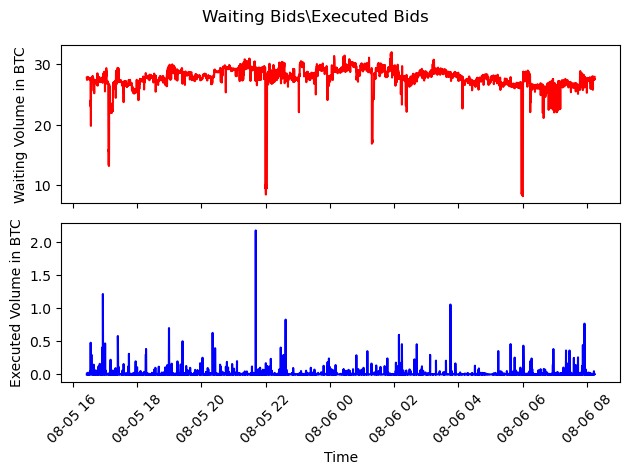

In [69]:
messages = {
    'title': 'Waiting Bids\Executed Bids',
    'top_y_label': 'Waiting Volume in BTC',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.bids_0_99.values, btc_eur_data.buy_qty.values, btc_eur_data.time.values, 0, len(btc_eur_data.time.values),messages)

In [70]:
np.corrcoef(btc_eur_data.bids_0_99.values, btc_eur_data.buy_qty.values)

array([[ 1.        , -0.01242487],
       [-0.01242487,  1.        ]])

$\quad$In principle, there is no reason to expect any correlation between the two - if there was one, then the hypothesis would require only one variable. Demand and supply are independent of each other. We are interested in what happens to the price under certain relationships between them. Therefore, we will focus on specific segments of the graph. These will be segments where we either have a decrease in the waiting volume or the opposite - an increase in the volume of executed orders. The lower graph shows several moments of strong demand. First, we will examine the strongest moment - somewhere between 21:30 and 22:10 o'clock on May 8th.

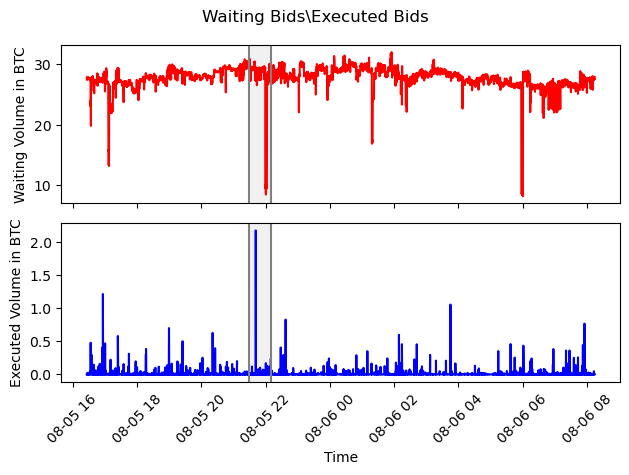

In [71]:
messages = {
    'title': 'Waiting Bids\Executed Bids',
    'top_y_label': 'Waiting Volume in BTC',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.bids_0_99.values, 
                       btc_eur_data.buy_qty.values, 
                       btc_eur_data.time, 0,len(btc_eur_data.time),
                       messages, 
                       draw_lines = ['2023-08-05 21:30:00', '2023-08-05 22:10:00'])

In [72]:
segment_1 = btc_eur_data.loc[(btc_eur_data['time'] >= '2023-08-05 21:30:00') & (btc_eur_data['time'] <= '2023-08-05 22:10:00')].copy()

In [73]:
segment_1.head()

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499
1539,126359458,2023-08-05 21:30:00,26805.10,0.0,0.01165,30.91349,10.99981,4.59066,3.33877,3.13394,21.07100,2.51724,2.18967,3.98213,4.11417
1540,126359460,2023-08-05 21:30:00,26805.10,0.0,0.00126,29.52154,10.61610,4.60730,3.56576,2.91488,20.92600,2.51724,2.18967,3.98213,4.11417
1541,126359461,2023-08-05 21:30:17,26805.10,0.0,0.00098,29.50346,9.94573,4.61640,3.59447,2.88022,24.54337,2.51850,2.18841,3.99260,4.10372
1542,126359468,2023-08-05 21:30:31,26805.12,0.0,0.06240,29.40701,10.55893,5.15058,3.23866,2.22638,26.16605,2.51655,2.18919,3.99181,4.10375
1543,126359469,2023-08-05 21:30:43,26805.13,0.0,0.00100,29.32203,10.55907,5.15315,3.33873,3.13315,26.86985,2.51636,2.18945,4.06647,4.03248


In [74]:
print(overview(segment_1))

Start time: 2023-08-05T21:30:00.000000000
End time: 2023-08-05T22:09:49.000000000
Time duration: 0 days 00:39:49 hours
Time duration in minutes: 40
High price: 26815.7
Low price: 26781.56
Average price: 26798.63
Maximum price difference: 34.14
Maximum price change relative to the arithmetic mean price: 0.13%
Total transactions count: 651
Average number of transactions per minute: 16.27
Total buy quantity: 3.92774 BTC
Total sell quantity: 2.38663 BTC
Total traded quantity: 6.31437 BTC
Average traded quantity per transaction: 0.009699 BTC


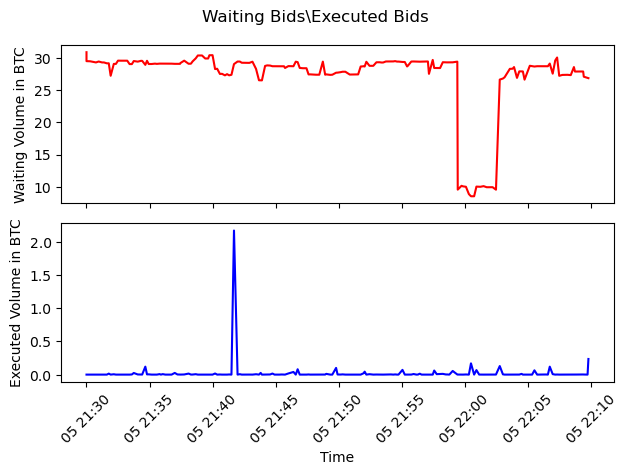

In [75]:
messages = {
    'title': 'Waiting Bids\Executed Bids',
    'top_y_label': 'Waiting Volume in BTC',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(segment_1.bids_0_99.values, segment_1.buy_qty.values, segment_1.time.values, 0, len(segment_1.time.values),messages)

In [76]:
np.corrcoef(segment_1.bids_0_99.values, segment_1.buy_qty.values)

array([[1.       , 0.0059876],
       [0.0059876, 1.       ]])

$\quad$The strong peak in **EUR** purchases is between 21:40 and 21:45. However, just above it, there is also an increase in the volume of pending orders, so it should compensate for the demand. On the other hand, this large peak is extremely short-lived and therefore not a trend – it's likely random and related to the execution of a specific large pending or market order. On the right side of the graph, around 22:00, there is a brief decrease in pending volumes (top graph), and at the same time, there is approximately the same value of executed orders. According to the logic of the hypothesis, there should be some price increase here. We will check this below, but before considering what's happening in the other 'camp'.

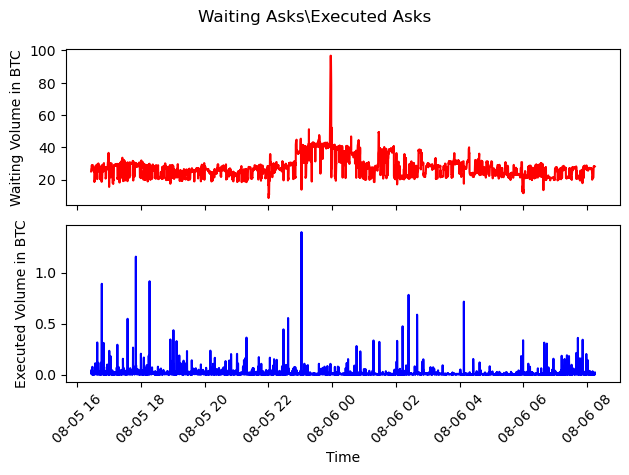

In [77]:
messages = {
    'title': 'Waiting Asks\Executed Asks',
    'top_y_label': 'Waiting Volume in BTC',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_data.asks_0_99.values, btc_eur_data.sell_qty.values, btc_eur_data.time.values, 0, len(btc_eur_data.time.values),messages)

In [78]:
np.corrcoef(segment_1.bids_0_99.values, segment_1.buy_qty.values)

array([[1.       , 0.0059876],
       [0.0059876, 1.       ]])

$\quad$Here we have several significant peaks in **BTC** sales – perhaps they are 'responsible' for the ultimate surplus of executed **BTC** orders for the entire period of the dataset, and more or less constant supply. Let's focus on the selected time segment and see what the picture of **BTC** sales looks like.

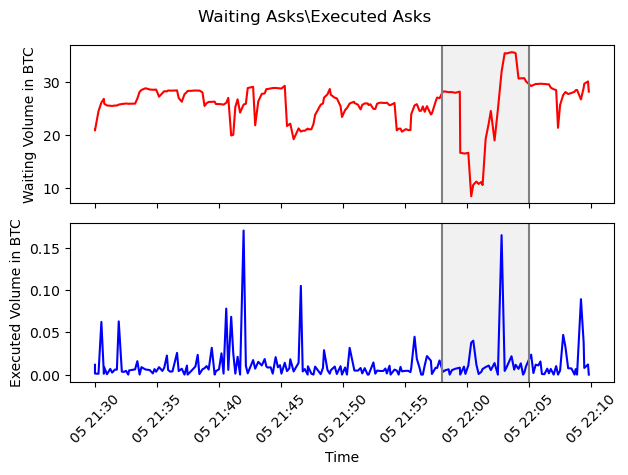

In [79]:
messages = {
    'title': 'Waiting Asks\Executed Asks',
    'top_y_label': 'Waiting Volume in BTC',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(segment_1.asks_0_99.values, 
                       segment_1.sell_qty.values, 
                       segment_1.time.values, 0, 
                       len(segment_1.time.values),
                       messages,
                       draw_lines = ['2023-08-05 21:58:00', '2023-08-05 22:05:00'])

$\quad$Somewhere around 22:00, we see a sharp decline in the waiting orders, and shortly after 22:00, there's a strong peak in executed orders. According to the logic of the hypothesis, this relationship between the two factors should lead to an increase in price. Before plotting the price, let's see the average values of executed and waiting orders in this period for both sides. The interesting aspect in the last graph is that we have numerous small peaks, which should result in a larger overall sales volume for this period.

In [80]:
segment_1.bids_0_99.mean(), segment_1.buy_qty.mean()

(27.285289702970303, 0.019444257425742566)

In [81]:
segment_1.asks_0_99.mean(), segment_1.sell_qty.mean()

(25.83886014851485, 0.011814999999999989)

$\quad$Here's a good example of how visual representation of data can be deceptive. It turns out that the total amount of sold **BTC** is less than the purchased **EUR**.

$\quad$Let's how the price movement looks within the specified period.

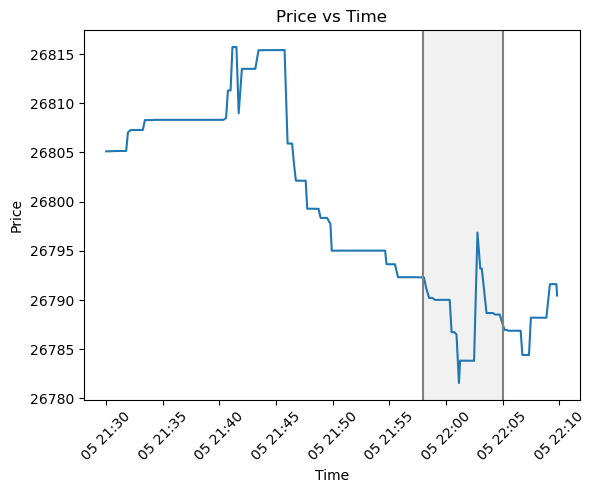

In [82]:
plot_feature_over_time(segment_1,'price', draw_lines = ['2023-08-05 21:58:00', '2023-08-05 22:05:00'])

$\quad$The price movement within the shaded gray segment appears to align with the assumption mentioned above. Let's plot the executed orders and the price together.

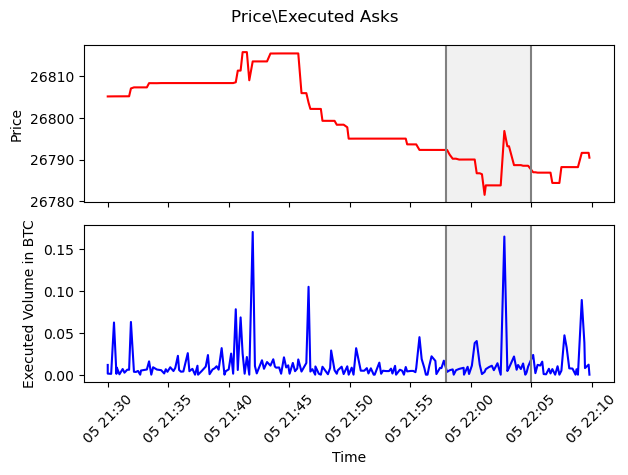

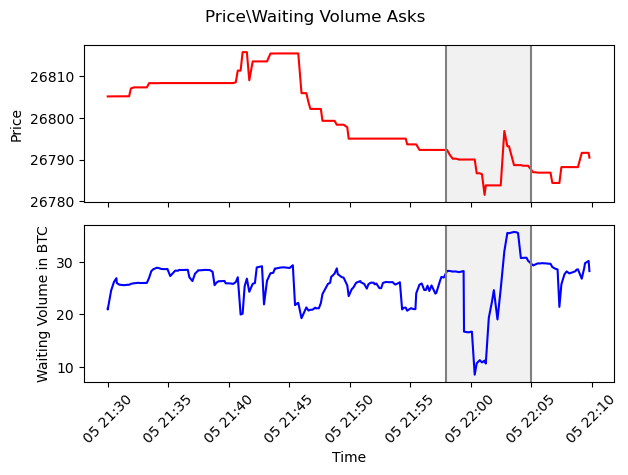

In [83]:
messages = {
    'title': 'Price\Executed Asks',
    'top_y_label': 'Price',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(segment_1.price.values, 
                       segment_1.sell_qty.values, 
                       segment_1.time.values, 0, 
                       len(segment_1.time.values),
                       messages,
                       draw_lines = ['2023-08-05 21:58:00', '2023-08-05 22:05:00'])

messages = {
    'title': 'Price\Waiting Volume Asks',
    'top_y_label': 'Price',
    'bottom_y_label': 'Waiting Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(segment_1.price.values, 
                       segment_1.asks_0_99.values, 
                       segment_1.time.values, 0, 
                       len(segment_1.time.values),
                       messages,
                       draw_lines = ['2023-08-05 21:58:00', '2023-08-05 22:05:00'])

$\quad$In the first half of the shaded segment, we observe, on one hand, an increase in the volume of executed orders (demand) and a decrease in the volume of pending orders (supply), and on the other hand, a decrease in the price - the opposite of the hypothesis predictions. In the second half, we simultaneously observe a sharp increase in demand, an increase in supply, and a rise in price. To understand the whole segment, we need to pay attention to what is happening with the **Bid** 'side' in the same time frame.

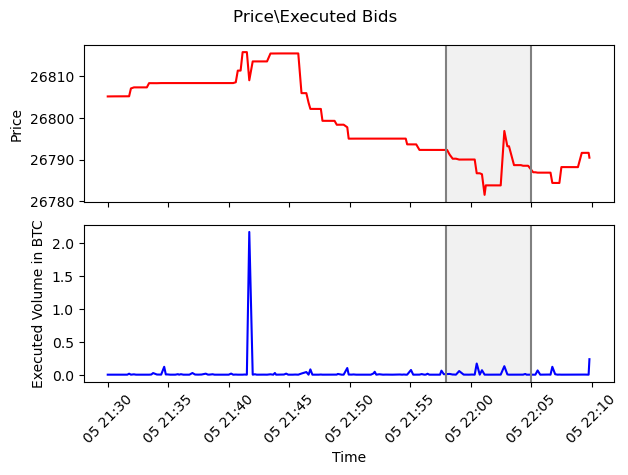

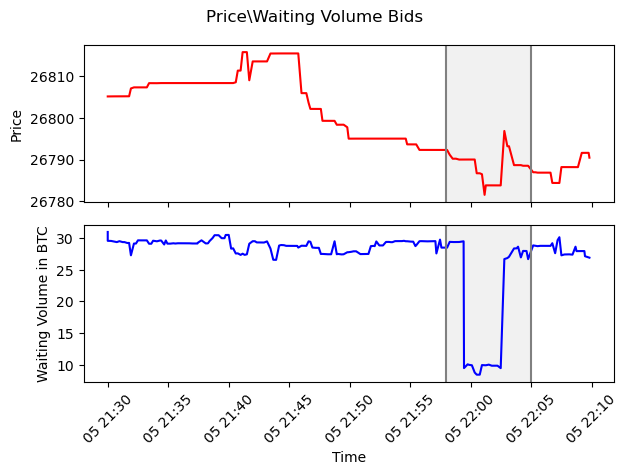

In [84]:
messages = {
    'title': 'Price\Executed Bids',
    'top_y_label': 'Price',
    'bottom_y_label': 'Executed Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(segment_1.price.values, 
                       segment_1.buy_qty.values, 
                       segment_1.time.values, 0, 
                       len(segment_1.time.values),
                       messages,
                       draw_lines = ['2023-08-05 21:58:00', '2023-08-05 22:05:00'])

messages = {
    'title': 'Price\Waiting Volume Bids',
    'top_y_label': 'Price',
    'bottom_y_label': 'Waiting Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(segment_1.price.values, 
                       segment_1.bids_0_99.values, 
                       segment_1.time.values, 0, 
                       len(segment_1.time.values),
                       messages,
                       draw_lines = ['2023-08-05 21:58:00', '2023-08-05 22:05:00'])

$\quad$We have a distinct decrease in the supply of **EUR**, while demand remains constant. According to the hypothesis, this should pull the price down - as it indeed happens - but at the same time, from the **Asks** side, the price should rise. In the second half of the shaded segment, the level of **Bid** supply is restored, while demand remains the same. This by itself doesn't imply a downward movement of the price, nor does it imply an upward movement.

$\quad$In conclusion, it must be said that drawing conclusions about the validity of the main hypothesis based on visual representation is very challenging, likely impossible. We need to find a precise numerical approach to this problem. Finding such a numerical approach first means finding a way to express the dynamics in the balance of forces between **Bids** and **Asks**, and then comparing this dynamics with the movement dynamics of the price.

In [85]:
display(HTML("<div style='text-align:center;'> <img src='data/Asks-and-Bids-conflict.png' width='500'></div>"))

## 5.5 Numerical expression of Asks and Bids Forces

$\quad$How should we approach this problem? We need to account for the simultaneous action of four separate factors - **Bid** supply and **Bid** demand, **Ask** supply and **Ask** demand. Since these are quantitative values with the same dimension - we measured them in volumes of **BTC**, it seems most logical to seek the values of the ratios between them. In other words, we need to construct fractions. However, we'll first need to create a fraction separately for **Bid** and **Ask**, then find the ratio between these two fractions, and finally determine the ratio of this final fraction to the price movement.

$\quad$Let's start with the **Ask**. According to the hypothesis, we have an increase in price when we have intensified demand, on one side, and weak supply, on the other side. This implies a direct proportional relationship with demand and an inverse proportional relationship with supply. Therefore, the executed volume should be in the numerator, while the waiting volume should be in the denominator. Let's introduce the variable $\alpha$, which we'll call the sales coefficient. Then, for $\alpha$, we have:

$$\alpha_{t} = \frac{D_{A_{t}}}{S_{A_{t}}},\quad S_{A_{t}}>0\quad\quad\quad\quad(3)$$

where:

$D_{A_{t}}$ is the volume of demand for a given time period and

$S_{A_{t}}$ is the volume of supply for a given time period.

$\quad$The $\alpha$ variable indicates the relationship between the volumes of demand and supply and does not consider their specific values and differences. This is the more accurate approach (at least according to the project's author) since using their values and differences could lead to distorting the results. Let's take a look at the average values of demand and supply for **Asks** within the original time interval of the analyzed dataset - approximately 10 seconds.

In [86]:
ask_supply = btc_eur_data.asks_0_99.mean()
ask_demand = btc_eur_data.sell_qty.mean()

In [87]:
ask_supply, ask_demand

(27.37984073535882, 0.014950609863496254)

$\quad$The difference in magnitudes is $10^3$. Such a high ratio would be much more challenging to interpret using the approach of the ratio between the two quantities. 

$\quad$Now let's see roughly in what order of magnitude the values of alpha will move. Since we have a small number in the numerator and a small number in the denominator, the value should be close to zero.

In [88]:
alpha = ask_demand/ask_supply

In [89]:
alpha

0.0005460444422596208

$\quad$This small value shouldn't concern us because what we're actually interested in is its movement. Based on the analysis of the dataset above, we should expect a similar number for the coefficient of purchases as well. 

$\quad$Let's introduce the coefficient of purchases, $\beta$. For $\beta$, we have the same formula:

$$\beta_{t} = \frac{D_{B_{t}}}{S_{B_{t}}},\quad S_{B_{t}}>0\quad\quad\quad\quad(4)$$

where:

$D_{B_{t}}$ is the volume of demand for a given time period and

$S_{B_{t}}$ is the volume of supply for a given time period.

Here is a slightly confusing point, and that is that according to this formula, the price should also increase when demand increases and supply decreases. In fact, the correct way to put it is that the **_value_** increases, not the **_price_**. In reality, if we have an increase in the value of **EUR** (the direction of **Bids**), then we have a decrease in the price of the **BTCEUR** pair. The formula is correct and accurately reflects the dynamics of the values.

$\quad$Let's also see what the average values of **Bids** are for the dataset period.

In [90]:
bid_supply = btc_eur_data.bids_0_99.mean()
bid_demand = btc_eur_data.buy_qty.mean()

In [91]:
bid_supply, bid_demand

(27.722331072214846, 0.011199482606781152)

In [92]:
beta = bid_demand/bid_supply

In [93]:
beta

0.00040398776631038843

$\quad$As expected, the value of $\beta$ is in the same order of magnitude as $\alpha$, indicating that the increases and decreases of the two values will be comparable in terms of percentage.

$\quad$So, now we have a precise quantitative methods for measuring the 'forces' in the **Asks** direction and the **Bids** direction. Next, we need to find a way to measure the dynamics between them, as according to the main hypothesis, it's the combination of these factors that should determine the price movement. We follow the same logic as with **Asks** and **Bids** separately, and thus introduce the variable **B**, which we will call the balance coefficient between the forces of **Asks** and **Bids**.

$$B_{t} = \frac{\alpha_{t}}{\beta_{t}}\quad\quad\quad\quad(5).$$

Substituting (3) and (4) in (5) and after algebraic transformations, we obtain:

$$B_{t} = \frac{D_{A_{t}}S_{B_{t}}}{S_{A_{t}}D_{B_{t}}},\quad D_{B_{t}}>0\quad\quad\quad\quad(6)$$


From (5), it is evident that when:

$$\alpha > \beta \rightarrow B > 1,$$  

$$\alpha = \beta \rightarrow B = 1,$$

$$\alpha < \beta \rightarrow B < 1,$$

$\quad$This is the final formula that we will use to test the main hypothesis. In simple terms, if **Asks** ($\alpha$) have an advantage, they will pull the price up. If **Bids** ($\beta$) have an advantage, the price goes down. If they are balanced, the price remains unchanged. Here, we can also see if it is valid for the entire period of the dataset.

In [94]:
B = alpha/beta

In [95]:
B

1.3516360835542942

This result indicates that we have an approximately 35% imbalance in the strengths of **Asks** compared to **Bids**. 

$\quad$As mentioned earlier, there is a slight increase in price towards the end of the dataset compared to the beginning. Let's review once again.

In [96]:
start_pirce = btc_eur_data.price.values[0]
end_price = btc_eur_data.price.values[4541]

In [97]:
start_pirce, end_price

(26761.29, 26808.0)

In [98]:
# Get ratio of the price increase
ratio = end_price/start_pirce

In [99]:
ratio

1.0017454315543084

In [100]:
# Ratio as percentage
f'{(ratio-1)*100:.2f}%'

'0.17%'

$\quad$This is in line with the main hypothesis, but still, a single instance cannot be taken as proof. 

$\quad$However, the nature of the balance coefficient necessitates a change in the metric by which it is measured. In the next paragraph, we will explain in detail why.

## 5.6 Changing the metric for the Balance Coefficient

$\quad$Up to this point, for the metric, we were using the Numpy method **corrcoeff()**. Due to its working mechanism, it will not be relevant for assessing the balance coefficient. The nature of the balance coefficient requires its performance to be measured in a different way. Let's calculate its values for the entire dataset. We will use the function **add_balance_coeff()**, which adds its exact value for each row in the table, and also adds boolean values indicating whether it corresponds to the price change. 

In [101]:
dataset_with_B_coeff = add_balance_coeff(btc_eur_data)

In [102]:
dataset_with_B_coeff.head()

,id,time,price,buy_qty,sell_qty,bids_0_99,bids_100_199,bids_200_299,bids_300_399,bids_400_499,asks_0_99,asks_100_199,asks_200_299,asks_300_399,asks_400_499,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,0.00000,0.03837,27.76501,9.83335,6.09676,2.84911,2.49594,25.03644,1.36131,2.18658,4.00745,4.10375,inf,unknown
1,126353552,2023-08-05 16:26:30,26761.28,0.01466,0.00626,27.53061,9.80582,6.12029,2.81913,2.52531,25.89224,1.63304,2.26127,4.00137,4.11340,0.454032,True
2,126353556,2023-08-05 16:26:45,26761.30,0.00058,0.01918,27.41062,9.80729,6.12030,2.84695,2.49616,26.70533,1.63642,2.25822,4.00109,4.11417,33.942320,True
3,126353563,2023-08-05 16:27:06,26761.30,0.00330,0.02026,27.73081,9.80713,6.12030,2.84695,2.49616,26.92322,1.63626,2.25822,4.00109,4.11417,6.323551,False
4,126353566,2023-08-05 16:27:14,26761.32,0.00110,0.01449,27.79676,9.70238,6.09767,2.88227,2.47785,27.36659,1.35989,2.18784,4.00746,4.10372,13.379787,True


Let's remove the unnecessary columns.

In [103]:
dataset_with_B_coeff = dataset_with_B_coeff.drop(columns=['bids_100_199','bids_200_299', 
                                         'bids_300_399', 'bids_400_499', 
                                         'asks_100_199', 'asks_200_299',
                                         'asks_300_399', 'asks_400_499'])

In [104]:
dataset_with_B_coeff

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,0.00000,0.03837,27.76501,25.03644,inf,unknown
1,126353552,2023-08-05 16:26:30,26761.28,0.01466,0.00626,27.53061,25.89224,0.454032,True
2,126353556,2023-08-05 16:26:45,26761.30,0.00058,0.01918,27.41062,26.70533,33.942320,True
3,126353563,2023-08-05 16:27:06,26761.30,0.00330,0.02026,27.73081,26.92322,6.323551,False
4,126353566,2023-08-05 16:27:14,26761.32,0.00110,0.01449,27.79676,27.36659,13.379787,True
...,...,...,...,...,...,...,...,...,...
4537,126367863,2023-08-06 08:13:29,26806.44,0.00000,0.00224,27.63173,28.09510,inf,False
4538,126367865,2023-08-06 08:13:39,26806.06,0.00634,0.00000,27.49921,28.13694,0.000000,True
4539,126367867,2023-08-06 08:13:52,26806.95,0.00108,0.00780,27.62880,28.16669,7.084302,True
4540,126367868,2023-08-06 08:14:04,26805.45,0.00281,0.00000,27.46245,28.16860,0.000000,True


In the "balance_coeff" column, we have decimal fractions, but we also have 'inf' and 0 in some places. Let's perform the necessary filtering to see exactly where they appear.

In [105]:
zeros = dataset_with_B_coeff[(dataset_with_B_coeff['buy_qty'] == 0) | (dataset_with_B_coeff['sell_qty'] == 0)]

In [106]:
zeros

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,0.00000,0.03837,27.76501,25.03644,inf,unknown
7,126353574,2023-08-05 16:27:45,26761.32,0.00000,0.01147,27.84186,28.86114,inf,True
8,126353575,2023-08-05 16:27:55,26761.32,0.00000,0.02228,27.82994,27.97832,inf,False
9,126353577,2023-08-05 16:28:13,26761.32,0.00262,0.00000,27.82732,28.21350,0.0,False
10,126353579,2023-08-05 16:28:21,26761.32,0.00172,0.00000,27.77035,28.51153,0.0,False
...,...,...,...,...,...,...,...,...,...
4533,126367852,2023-08-06 08:12:45,26807.97,0.00000,0.00518,27.70143,28.03382,inf,True
4535,126367858,2023-08-06 08:13:04,26806.80,0.02333,0.00000,27.69803,28.05654,0.0,True
4537,126367863,2023-08-06 08:13:29,26806.44,0.00000,0.00224,27.63173,28.09510,inf,False
4538,126367865,2023-08-06 08:13:39,26806.06,0.00634,0.00000,27.49921,28.13694,0.0,True


$\quad$The rows where 'inf' and 0 appear are the rows where we have zeros in the **buy_qty** ор **sell_qty** columns, respectively. This is easily explainable if we take into account formula (6).

$$B_{t} = \frac{D_{A_{t}}S_{B_{t}}}{S_{A_{t}}D_{B_{t}}}\quad\quad\quad\quad(6)$$

$B_{t} = \infty$ when $D_{B_{t}} = 0$ (**buy_qty**), and $B_{t} = 0$ when $D_{A_{t}} = 0$ (**sell_qty**).

The occurrence of zeros in both **buy_qty** and **sell_qty** happens because the interval of ten seconds is small enough, and there's nothing unusual about not having any transactions in either direction within such a short time frame.

$\quad$What should we do with the zeros? One option is to remove them from the rows; however, this approach will result in the loss of a significant amount of information that is essential for analysis. The zeros constitute 56.65% of the infomation in the entire dataset.

In [107]:
f'{(len(zeros)/ len(dataset_with_B_coeff))*100:.2f}%'

'56.65%'

$\quad$The other option is to replace them with some value. This is the better option because it will both retain the amount of information and preserve the logic of the balance coefficient formula simultaneously.

In [108]:
# Number of rows with zeros.
bids_zeros = len(dataset_with_B_coeff[dataset_with_B_coeff['buy_qty'] == 0])
asks_zeros = len(dataset_with_B_coeff[dataset_with_B_coeff['sell_qty'] == 0])
bids_and_asks = len(dataset_with_B_coeff[(dataset_with_B_coeff['buy_qty'] == 0) & (dataset_with_B_coeff['sell_qty'] == 0)])
bids_zeros, asks_zeros, bids_and_asks

(1977, 596, 0)

In [109]:
print('Total zeros percent for bids:', f'{bids_zeros/len(dataset_with_B_coeff)*100:.2f}%')
print('Total zeros percent for asks:', f'{asks_zeros/len(dataset_with_B_coeff)*100:.2f}%')
print('Total zeros percent for asks and bids:', f'{bids_and_asks/len(dataset_with_B_coeff)*100:.2f}%')

Total zeros percent for bids: 43.53%
Total zeros percent for asks: 13.12%
Total zeros percent for asks and bids: 0.00%


$\quad$This is a very interesting result. It turns out that during almost half of the time - 43.53%, there is no trading activity in the **Bid** direction, compared to only 13.12% of the time without trading activity for **Asks**. This once again explains the final result with the price increase at the beginning and end of the dataset.

In [110]:
print('Start price:', dataset_with_B_coeff.price.values[0])
print('End price:', dataset_with_B_coeff.price.values[4541])

Start price: 26761.29
End price: 26808.0


$\quad$Now, let's replace the zeros with a value of our choice. Let this value be very close to zero - let's say 0.0000001 (1e-7). Replacing the zeros with this value will preserve the logic of the balance coefficient in the sense that the coefficient alpha (**Asks**) will continue to be greater than one, and the coefficient beta (**Bids**) will remain smaller than one. By introducing this value, we expect the values of alpha (when we have zeros in **buy_qty**) to become very large numbers, and conversely, the values of beta (when we have zeros in **sell_qty**) to become very small, close to zero numbers.

In [111]:
# Replace zeros
dataset_with_B_coeff = replace_zeros(dataset_with_B_coeff, 0.0000001)

In [112]:
dataset_with_B_coeff

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,1.000000e-07,3.837000e-02,27.76501,25.03644,inf,unknown
1,126353552,2023-08-05 16:26:30,26761.28,1.466000e-02,6.260000e-03,27.53061,25.89224,0.454032,True
2,126353556,2023-08-05 16:26:45,26761.30,5.800000e-04,1.918000e-02,27.41062,26.70533,33.942320,True
3,126353563,2023-08-05 16:27:06,26761.30,3.300000e-03,2.026000e-02,27.73081,26.92322,6.323551,False
4,126353566,2023-08-05 16:27:14,26761.32,1.100000e-03,1.449000e-02,27.79676,27.36659,13.379787,True
...,...,...,...,...,...,...,...,...,...
4537,126367863,2023-08-06 08:13:29,26806.44,1.000000e-07,2.240000e-03,27.63173,28.09510,inf,False
4538,126367865,2023-08-06 08:13:39,26806.06,6.340000e-03,1.000000e-07,27.49921,28.13694,0.000000,True
4539,126367867,2023-08-06 08:13:52,26806.95,1.080000e-03,7.800000e-03,27.62880,28.16669,7.084302,True
4540,126367868,2023-08-06 08:14:04,26805.45,2.810000e-03,1.000000e-07,27.46245,28.16860,0.000000,True


Let's now recalculate the balance coefficient.

In [113]:
dataset_with_B_coeff = add_balance_coeff(dataset_with_B_coeff)

In [114]:
dataset_with_B_coeff

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,1.000000e-07,3.837000e-02,27.76501,25.03644,425517.139697,unknown
1,126353552,2023-08-05 16:26:30,26761.28,1.466000e-02,6.260000e-03,27.53061,25.89224,0.454032,True
2,126353556,2023-08-05 16:26:45,26761.30,5.800000e-04,1.918000e-02,27.41062,26.70533,33.942320,True
3,126353563,2023-08-05 16:27:06,26761.30,3.300000e-03,2.026000e-02,27.73081,26.92322,6.323551,False
4,126353566,2023-08-05 16:27:14,26761.32,1.100000e-03,1.449000e-02,27.79676,27.36659,13.379787,True
...,...,...,...,...,...,...,...,...,...
4537,126367863,2023-08-06 08:13:29,26806.44,1.000000e-07,2.240000e-03,27.63173,28.09510,22030.558781,False
4538,126367865,2023-08-06 08:13:39,26806.06,6.340000e-03,1.000000e-07,27.49921,28.13694,0.000015,True
4539,126367867,2023-08-06 08:13:52,26806.95,1.080000e-03,7.800000e-03,27.62880,28.16669,7.084302,True
4540,126367868,2023-08-06 08:14:04,26805.45,2.810000e-03,1.000000e-07,27.46245,28.16860,0.000035,True


In [115]:
# Check for big numbers in balance_coeff
dataset_with_B_coeff[(dataset_with_B_coeff.buy_qty == 1.000000e-07)].balance_coeff.values.mean()

169563.84665167367

In [116]:
# Check for small numbers in balance_coeff
dataset_with_B_coeff[(dataset_with_B_coeff.sell_qty == 1.000000e-07)].balance_coeff.values.mean()

5.423934856937823e-05

The numbers are indeed as we expected them to be.

$\quad$Now let's take a look at the new dataset and explain again what exactly the columns contain. At index 1, we have a price of **26761.28**. Next to it, the columns **buy_qty** and **sell_qty** represent the sum of all executed **Bid** and **Ask** orders within the interval between the previous row (index 0) and the current row, which is a total of 11 seconds. Next to them are the columns **bids_0_99** and **ask_0_99**, which show the total volume of pending orders at the current moment, i.e., the time of index 1.

$\quad$The new column is the balance coefficient - **balance_coeff**, which indicates the balance of **Bid** and **Ask** 'forces' for the interval between the previous and current indices, calculated using formula (6). The last column, **match_balance_coeff** shows with a boolean value whether the balance coefficient correctly reflects the price change compared to the previous index. In this case, **B<1**, the current price **26761.28** is lower than the previous **26761.29**, and therefore the value in **match_balance_coeff** is **True**. The balance of forces is in favor of **Bid**, and the price has decreased. Next, at index 3, the value is **False** because there is no price change compared to index 2 – the price is **26761.30** in both indices.

$\quad$All of this logic necessitates the introduction of a new metric for the balance coefficient. This metric is very simple and consists of calculating how many times the coefficient accurately reflects the price movement compared to the previous time interval. In other words, it's the count of **True** values in **match_balance_coeff** divided by the total number of time intervals or rows in the table.

The first value is **unknown** because we don't have information about the price before index 0.

$\quad$Now let's apply the new metric to the balance coefficient and see what it will indicate.

## 5.7 Testing the Balance Coefficient

$\quad$Now let's apply the new metric to the balance coefficient and see what it will indicate. Let's compare the coefficient graph with the price graph.

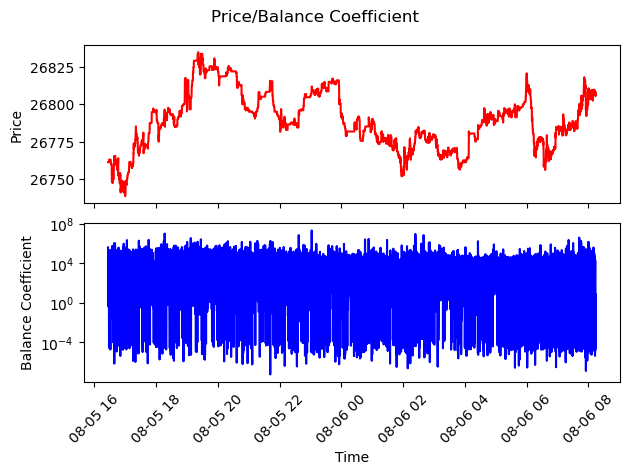

In [117]:
messages = {
    'title': 'Price/Balance Coefficient',
    'top_y_label': 'Price',
    'bottom_y_label': 'Balance Coefficient',
    'x_label': 'Time'
}
plot_one_above_another(dataset_with_B_coeff.price.values, dataset_with_B_coeff.balance_coeff.values, dataset_with_B_coeff.time.values, 
                                   0, len(btc_eur_data.price.values), messages, ylog=True)

$\quad$The graph is difficult to read, so we won't be using visualizations from here onwards. We will use numerical representation only. Let's check to what extent the balance coefficient correlates with the price movement.

In [118]:
get_balance_percentage(dataset_with_B_coeff)

0.4558467297951993

$\quad$It's not too bad. In approximately 46% of cases, the 'balance of forces' correctly reflects the price movement.Let's see, for comparison, what the correlation coefficient will reveal.

In [119]:
np.corrcoef(dataset_with_B_coeff.balance_coeff, dataset_with_B_coeff.price)

array([[1.        , 0.03568753],
       [0.03568753, 1.        ]])

$\quad$There is no correlation. This result is not realistic. It is not possible to have absolutely no correlation between demand, supply, and price movement. We can conclude that the decision to change the metric is correct, and the choice of a new metric is appropriate.

$\quad$Above, we formulated the hypothesis that '_The correlation coefficient between the total net executed order quantity and price movement is directly proportional to the size of the time period over which both variables are considered_'. Here, we will reformulate it for the balance coefficient.

##### <center>Hypothesis<center>

$\quad$_The success rate of the balance coefficient is directly proportional to the size of the time period to which it is applied_.

$\quad$To test this hypothesis, we will do the same as before - we will group the dataset in increasing intervals. Just like then, the accuracy of the measurement is expected to decrease due to the decreasing amount of incoming data with the increase of the time period. First, we will manually do this for a one-minute interval.

In [120]:
dataset_with_B_coeff_1_minute = group_by_time_intervals(dataset_with_B_coeff,time_interval = 1, balance_coeff = True, value_to_replace = 0.0000001)

In [121]:
dataset_with_B_coeff_1_minute

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353570,2023-08-05 16:27:29,26761.31,0.01964,0.09856,27.646762,26.384764,5.258333,unknown
1,126353587,2023-08-05 16:28:35,26761.32,0.00696,0.04422,27.838792,28.454748,6.215766,True
2,126353618,2023-08-05 16:29:45,26762.87,0.04652,0.12465,27.753804,28.855604,2.577185,True
3,126353639,2023-08-05 16:31:05,26762.87,0.01534,0.07548,27.607126,26.199176,5.184910,False
4,126353662,2023-08-05 16:32:20,26759.98,0.01594,0.06263,27.515686,26.379888,4.098253,False
...,...,...,...,...,...,...,...,...,...
752,126367819,2023-08-06 08:09:45,26806.03,0.02110,0.01922,27.024578,23.667436,1.040114,True
753,126367830,2023-08-06 08:10:45,26808.81,0.00617,0.05401,27.364438,21.306198,11.241965,True
754,126367842,2023-08-06 08:11:47,26808.35,0.01454,0.02458,27.331978,21.213584,2.178062,False
755,126367858,2023-08-06 08:13:04,26806.80,0.05794,0.02190,27.748050,28.083004,0.373468,True


In [122]:
get_balance_percentage(dataset_with_B_coeff_1_minute)

0.5793650793650794

$\quad$There is a significant increase. Let's try with intervals from 1 to 30 minutes and plot the results.

In [123]:
coefficients = calc_correlations_by_time_interval(dataset_with_B_coeff, 'balance_coeff')

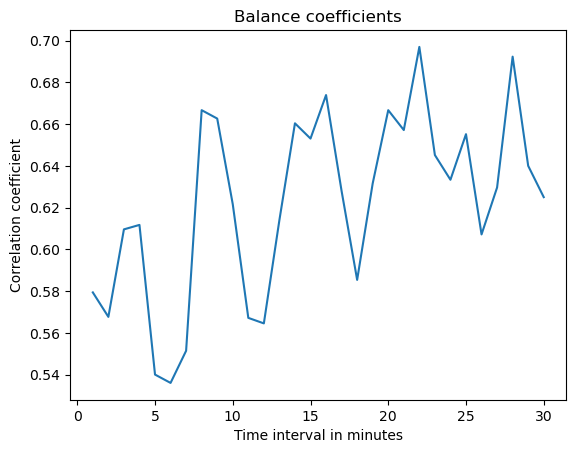

In [124]:
plot_correlations(coefficients, 'Balance coefficients')

In [125]:
coefficients.correlation_coefficient.mean()

0.6224351404852719

$\quad$The graph shows a slight tendency to increase, even though the accuracy should decrease with increasing intervals. The average value of the coefficients, approximately 0.61, indicates that in more than half of the cases, it correctly reflects the price movement. However, there is still a 40% error, which is not negligible, and needs to be analyzed to understand where and why it fails.

$\quad$Let's take another look at the prices in the original ten-second interval.

In [126]:
dataset_with_B_coeff.head()

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,1.000000e-07,0.03837,27.76501,25.03644,425517.139697,unknown
1,126353552,2023-08-05 16:26:30,26761.28,1.466000e-02,0.00626,27.53061,25.89224,0.454032,True
2,126353556,2023-08-05 16:26:45,26761.30,5.800000e-04,0.01918,27.41062,26.70533,33.942320,True
3,126353563,2023-08-05 16:27:06,26761.30,3.300000e-03,0.02026,27.73081,26.92322,6.323551,False
4,126353566,2023-08-05 16:27:14,26761.32,1.100000e-03,0.01449,27.79676,27.36659,13.379787,True


$\quad$At indexes 2 and 3, there is no change in the price - it remains **26761.30**. The balance coefficient at index 3 is greater than one - this is an incorrect value, and consequently, the value in the **match_balance_coeff** column is **False**. This likely explains why the success rate is so low - only 46%. Since the market activity throughout the dataset period is weak, the probability of the price not changing in any two consecutive time periods should be high. At the same time, it is **MATHEMATICALLY IMPOSSIBLE** for the balance coefficient to be exactly equal to one. Why? Because the coefficient is a fraction formed from four independent variables that can take continuous values - they are real numbers. Let's still check if there is any place where the coefficient is equal to one.

In [127]:
len(dataset_with_B_coeff[dataset_with_B_coeff.balance_coeff == 1])

0

This implies a few things:
1. When there is no change in price over two consecutive periods, **B** will always be incorrect due to pure mathematical reasons, not because the logic behind it is wrong.
2. Perfect balance in the forces of **Ask** and **Bid** is not possible.
3. If during periods of low market activity we have a high error percentage in the coefficient, then conversely, during periods of strong market activity, the error should decrease. This is very good news - in reality, we are most interested in having a more accurate coefficient precisely when there are significant market fluctuations. When there are no fluctuations, it doesn't really matter if our predictions are wrong.
4. Conversely, all of this discovers a good opportunity for the error rate to be used as an indicator of market activity. This could be very useful in a future attempt to predict prices.

All of this will be examined during the analysis of the next dataset, where fortunately we have stronger market activity.

$\quad$Now, we need to determine the percentage of time in this dataset where there has been no price movement. To achieve this, we simply need to count how many times the price remains the same in two consecutive intervals. We will apply a function that checks if the previous price is the same as the current one and creates a new boolean column in the dataset.

In [128]:
dataset_with_B_coeff = add_is_equal_prices(dataset_with_B_coeff)

In [129]:
dataset_with_B_coeff

,id,time,price,is_previous_equals,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126353548,2023-08-05 16:26:19,26761.29,unknown,1.000000e-07,3.837000e-02,27.76501,25.03644,425517.139697,unknown
1,126353552,2023-08-05 16:26:30,26761.28,False,1.466000e-02,6.260000e-03,27.53061,25.89224,0.454032,True
2,126353556,2023-08-05 16:26:45,26761.30,False,5.800000e-04,1.918000e-02,27.41062,26.70533,33.942320,True
3,126353563,2023-08-05 16:27:06,26761.30,True,3.300000e-03,2.026000e-02,27.73081,26.92322,6.323551,False
4,126353566,2023-08-05 16:27:14,26761.32,False,1.100000e-03,1.449000e-02,27.79676,27.36659,13.379787,True
...,...,...,...,...,...,...,...,...,...,...
4537,126367863,2023-08-06 08:13:29,26806.44,False,1.000000e-07,2.240000e-03,27.63173,28.09510,22030.558781,False
4538,126367865,2023-08-06 08:13:39,26806.06,False,6.340000e-03,1.000000e-07,27.49921,28.13694,0.000015,True
4539,126367867,2023-08-06 08:13:52,26806.95,False,1.080000e-03,7.800000e-03,27.62880,28.16669,7.084302,True
4540,126367868,2023-08-06 08:14:04,26805.45,False,2.810000e-03,1.000000e-07,27.46245,28.16860,0.000035,True


At index 3, the new column **is_previous_equals** is True because the price at index 2 is equal to the price at index 3.

$\quad$We now know where **B** is mathematically impossible to be true. Now we want to check the success rate of **B** where **IT IS** mathematically possible to be true - that is, where there is a price movement.

In [130]:
dataset_with_B_coeff.is_previous_equals.value_counts()

False      2956
True       1585
unknown       1
Name: is_previous_equals, dtype: int64

In 1585 cases, the price is equal to the previous one. Let's remove these cases from the dataset and check the success rate.

In [131]:
get_balance_percentage(dataset_with_B_coeff, exclude_equal_prices=True)

0.700507614213198

$\quad$In 70% of the cases where it is mathematically possible, the balance coefficient correctly reflects the price movement. This is a strong support for the main hypothesis. However, there still remain 30% of cases where it fails. Before considering the possible reasons for this not insignificant degree of error, let's examine what happens when we increase the time period.

$\quad$Earlier, we isolated the one-minute interval in a separate dataset.

In [132]:
dataset_with_B_coeff_1_minute = add_is_equal_prices(dataset_with_B_coeff_1_minute)
get_balance_percentage(dataset_with_B_coeff_1_minute, exclude_equal_prices=True)

0.6547085201793722

$\quad$The percentage is higher than the testing of the same interval above - 0.579. Surprisingly, the percentage is lower than the ten-second interval without the equal prices. Let's run a check for intervals from 1 to 30 minutes.

In [133]:
coefficients = calc_correlations_by_time_interval(dataset_with_B_coeff, 'balance_coeff', exclude_equal_prices=True)

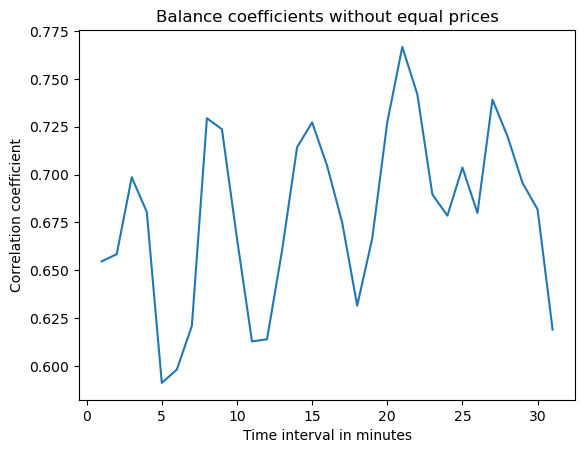

In [134]:
plot_correlations(coefficients, 'Balance coefficients without equal prices')

In [135]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.6797633154106072, 0.7666666666666667, 0.5912408759124088)

$\quad$The graph shows the same weak tendency to increase, but the average success rate is slightly higher now - jumping from 0.62 to 0.68. Is this the optimal alignment of the balance coefficient with respect to the price?? If during a highly active market we indeed have fewer cases where two consecutive prices are equal, then we are left with the cases where prices are not equal, and the success rate should be similar to the one we just obtained. In fact, let's check how the count of equal prices changes as the interval increases.

In [136]:
equal_prices_df = get_equal_prices(dataset_with_B_coeff)

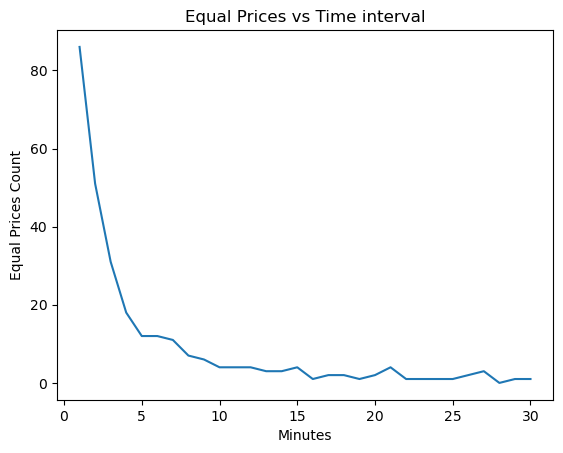

In [137]:
plt.plot(equal_prices_df.time_interval, equal_prices_df.equal_prices_count)
plt.title('Equal Prices vs Time interval')
plt.xlabel('Minutes')
plt.ylabel('Equal Prices Count')
plt.show()

$\quad$The number of equal prices is inversely proportional to the size of the time interval - the larger the interval, the lower the probability that the price will remain the same. The graph resembles the function **1/x**. Here, we have a weak market, and we can observe that even within larger intervals - say, 15 minutes or more - we still have one or two instances of equal prices. It can be assumed that in an active market, this wouldn't occur. Another aspect to consider is that the fact that the price is the same at the end of the interval doesn't necessarily mean it hasn't moved during that time.

$\quad$It's time to examine the other dataset.

## 5.8 Dataset btc_eur_8_8_max_100 overview

$\quad$Let's start by reviewing this dataset.

In [138]:
btc_eur_8_8_max_100 = pd.read_csv('data/btc_eur_8_8_max_100_csv')

In [139]:
# Transform time column to readable format
btc_eur_8_8_max_100.time = btc_eur_8_8_max_100.time.apply(lambda x: pd.to_datetime(x, unit='ms'))
btc_eur_8_8_max_100.time =btc_eur_8_8_max_100.time.dt.strftime('%Y-%m-%d %H:%M:%S')

In [140]:
print(overview(btc_eur_8_8_max_100))

Start time: 2023-08-08 07:02:30
End time: 2023-08-08 18:15:07
Time duration: 0 days 11:12:37 hours
Time duration in minutes: 673
High price: 27800.24
Low price: 26878.06
Average price: 27339.15
Maximum price difference: 922.18
Maximum price change relative to the arithmetic mean price: 3.37%
Total transactions count: 23585
Average number of transactions per minute: 35.04
Total buy quantity: 251.33591 BTC
Total sell quantity: 301.25099 BTC
Total traded quantity: 552.58690 BTC
Average traded quantity per transaction: 0.023430 BTC


Let's also display the previous one for comparison.

In [141]:
print(overview(btc_eur_data))

Start time: 2023-08-05T16:26:19.000000000
End time: 2023-08-06T08:14:14.000000000
Time duration: 0 days 15:47:55 hours
Time duration in minutes: 948
High price: 26834.82
Low price: 26738.52
Average price: 26786.67
Maximum price difference: 96.30
Maximum price change relative to the arithmetic mean price: 0.36%
Total transactions count: 14324
Average number of transactions per minute: 15.11
Total buy quantity: 50.86805 BTC
Total sell quantity: 67.90567 BTC
Total traded quantity: 118.77372 BTC
Average traded quantity per transaction: 0.008292 BTC


$\quad$It's immediately evident that in this dataset, we've captured a much more active period compared to the previous one. Despite the period being shorter than the previous one - 11 hours versus almost 16 hours - we have growth in most of the indicators. There's a 5-fold increase in total traded volume, an almost 10-fold larger price change compared to the period's arithmetic mean, 65% more transactions, and so on. 

$\quad$Let's also take a look at how the price movement appears.

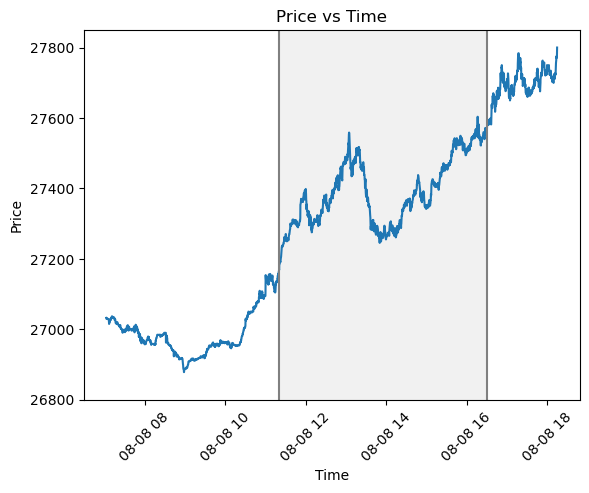

In [142]:
plot_feature_over_time(btc_eur_8_8_max_100, 'price', ylim = [26800, 27850], draw_lines = ['2023-08-08 11:20:00', '2023-08-08 16:30:30'])

$\quad$There is a strong upward trend with a wide range of fluctuations both upward and downward. Unlike the previous dataset, here we do not expect a normal distribution of prices.

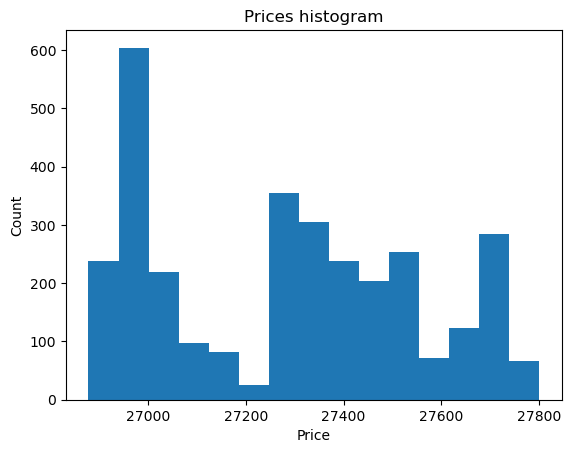

In [143]:
plt.hist(btc_eur_8_8_max_100.price, bins = 15)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Prices histogram')
plt.show()

$\quad$We have three distinct 'peaks' - the first corresponds to price fluctuations in the left segment of the upper graph, approximately between **26,800** and **27,200**. The second is the shaded segment with prices between 27200 and 27600. The third peak corresponds to fluctuations in the right segment between **27,600** and **28,000**. In a future project for price prediction, the shape of the histogram in a given time period can be used as an indicator of market activity.

$\quad$Let's take a look at the dataset itself.

In [144]:
btc_eur_8_8_max_100.head()

,id,time,price,buy_qty,sell_qty,bids_0_19,bids_20_39,bids_40_59,bids_60_79,bids_80_99,asks_0_19,asks_20_39,asks_40_59,asks_60_79,asks_80_99
0,126428417,2023-08-08 07:02:30,27032.28,0.09410,0.00000,4.32627,9.22169,7.26690,2.47570,2.42572,1.24960,14.83979,0.18674,0.19970,0.64943
1,126428418,2023-08-08 07:02:49,27029.83,0.00856,0.00000,2.73835,7.47590,10.89040,2.56663,2.29669,10.28012,5.76289,0.18938,0.08308,1.20315
2,126428419,2023-08-08 07:03:08,27031.04,0.00000,0.00093,4.47338,9.30936,7.26619,2.47602,2.42819,10.32265,5.76017,0.18564,0.11513,1.17103
3,126428422,2023-08-08 07:03:17,27031.03,0.03771,0.00000,4.36533,9.31297,7.26768,2.47490,2.29499,7.65305,8.51049,0.18664,0.08051,1.20941
4,126428425,2023-08-08 07:03:31,27031.07,0.00243,0.00179,4.36495,9.22084,7.26619,2.47601,2.42819,6.82401,13.05465,0.18145,0.03986,1.14257


$\quad$Here, we'll approach the columns for pending orders a bit differently. This time, we take the range of pending orders from 0 to 100 prices above or below the current one, and we also divide this range into 5 equal segments - 0_19, 20_39, 40_59, and so on. The idea is, on the one hand, to have similar conditions as the previous dataset - to capture the pending volumes up to one hundred. On the other hand, we aim to explore whether and to what extent the pending volumes in the smaller subdivisions are related to price movement.

$\quad$Let's start the analysis with the entire order volume.

In [145]:
# Get total waiting volumes up to 100 prices and create a new dataset without smaller ranges columns
btc_eur_8_8 = create_total_volumes_dataset(btc_eur_8_8_max_100)

In [146]:
btc_eur_8_8.head()

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99
0,126428417,2023-08-08 07:02:30,27032.28,0.09410,0.00000,25.71628,17.12526
1,126428418,2023-08-08 07:02:49,27029.83,0.00856,0.00000,25.96797,17.51862
2,126428419,2023-08-08 07:03:08,27031.04,0.00000,0.00093,25.95314,17.55462
3,126428422,2023-08-08 07:03:17,27031.03,0.03771,0.00000,25.71587,17.64010
4,126428425,2023-08-08 07:03:31,27031.07,0.00243,0.00179,25.75618,21.24254


$\quad$Let's see how many zeros are in this dataset. Due to the strong market activity, we expect them to be fewer in number and a smaller percentage compared to the total number of transactions.

In [147]:
# Number of rows with zeros.
zeros = btc_eur_8_8[(btc_eur_8_8['buy_qty'] == 0) | (btc_eur_8_8['sell_qty'] == 0)]
bids_zeros = len(btc_eur_8_8[btc_eur_8_8['buy_qty'] == 0])
asks_zeros = len(btc_eur_8_8[btc_eur_8_8['sell_qty'] == 0])
bids_and_asks = len(btc_eur_8_8[(btc_eur_8_8['buy_qty'] == 0) & (btc_eur_8_8['sell_qty'] == 0)])
bids_zeros, asks_zeros, bids_and_asks

(677, 485, 0)

In [148]:
print('Total zeros percent for bids:', f'{bids_zeros/len(btc_eur_8_8)*100:.2f}%')
print('Total zeros percent for asks:', f'{asks_zeros/len(btc_eur_8_8)*100:.2f}%')
print('Total zeros percent for asks and bids:', f'{bids_and_asks/len(btc_eur_8_8)*100:.2f}%')
print(f'Total zeros: {(len(zeros)/ len(btc_eur_8_8))*100:.2f}%')

Total zeros percent for bids: 21.39%
Total zeros percent for asks: 15.32%
Total zeros percent for asks and bids: 0.00%
Total zeros: 36.71%


$\quad$Zeros are 20% fewer than in the previous dataset. There's a bias towards the **Bid** side - meaning that in cases where there are no trades in the downward direction, there are only trades in the upward direction, which aligns with the overall trend direction. Now, we will add the coefficient **B** and the equal prices.

In [149]:
# Replace zeros
btc_eur_8_8 = replace_zeros(btc_eur_8_8, 0.0000001)

In [150]:
btc_eur_8_8 = add_balance_coeff(btc_eur_8_8)

In [151]:
btc_eur_8_8 = add_is_equal_prices(btc_eur_8_8)

In [152]:
btc_eur_8_8

,id,time,price,is_previous_equals,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126428417,2023-08-08 07:02:30,27032.28,unknown,9.410000e-02,1.000000e-07,25.71628,17.12526,1.595811e-06,unknown
1,126428418,2023-08-08 07:02:49,27029.83,False,8.560000e-03,1.000000e-07,25.96797,17.51862,1.731667e-05,True
2,126428419,2023-08-08 07:03:08,27031.04,False,1.000000e-07,9.300000e-04,25.95314,17.55462,1.374933e+04,True
3,126428422,2023-08-08 07:03:17,27031.03,False,3.771000e-02,1.000000e-07,25.71587,17.64010,3.865838e-06,True
4,126428425,2023-08-08 07:03:31,27031.07,False,2.430000e-03,1.790000e-03,25.75618,21.24254,8.931446e-01,False
...,...,...,...,...,...,...,...,...,...,...
3160,126451856,2023-08-08 18:14:12,27770.98,False,2.770000e-03,1.209000e-02,29.36795,27.76074,4.617311e+00,False
3161,126451869,2023-08-08 18:14:27,27775.04,False,2.706200e-01,7.340000e-03,29.76399,27.20253,2.967687e-02,False
3162,126451881,2023-08-08 18:14:34,27771.80,False,2.822500e-01,1.000000e-07,30.29384,26.54720,4.042981e-07,True
3163,126451890,2023-08-08 18:14:51,27775.05,False,1.000000e-07,2.429900e-01,27.80090,19.35246,3.490688e+06,True


$\quad$First, let's see how many times there have been equal prices in consecutive intervals. We expect that if there are any, they won't be very frequent.

In [153]:
btc_eur_8_8.is_previous_equals.value_counts()

False      2872
True        292
unknown       1
Name: is_previous_equals, dtype: int64

In [154]:
print(f'Equal prices percentage: {btc_eur_8_8.is_previous_equals.value_counts()["True"]/(len(btc_eur_8_8) -1)*100:.2f}%')

Equal prices percentage: 9.23%


$\quad$As expected, equal prices aren't numerous, as we're in a period of strong market activity. Now we will see the success rate of the balance coefficient.

In [155]:
get_balance_percentage(btc_eur_8_8)

0.577117572692794

$\quad$Approximately 58% for the original 10-second interval. Let's recall that in the previous dataset, this percentage was 45%. This is an increase in success rate of about 29%. Since we don't have a high percentage of equal prices here, we can expect a slight increase in this percentage when we remove them.

In [156]:
get_balance_percentage(btc_eur_8_8, exclude_equal_prices=True)

0.6360153256704981

$\quad$In the previous dataset, when we excluded equal prices, we had a jump from 45% to 70% - a total increase of 25%. In this case, the increase is more modest - around 6%.

$\quad$Before we proceed with interval breakdowns, we forgot to check whether we have a **$B = 1$** in cases where we have equal prices.

In [157]:
len(btc_eur_8_8[btc_eur_8_8.balance_coeff == 1])

0

Once again, we don't have any cases of a perfect balance between the forces of **Asks** and **Bids**.

$\quad$Now, let's check what will happen to **B** in a one-minute interval.

In [158]:
btc_eur_8_8_1_minute = group_by_time_intervals(btc_eur_8_8,time_interval = 1, balance_coeff = True, value_to_replace = 0.0000001)

In [159]:
btc_eur_8_8_1_minute.head()

,id,time,price,buy_qty,sell_qty,bids_0_99,asks_0_99,balance_coeff,match_balance_coeff
0,126428426,2023-08-08 07:03:42,27030.76,0.14280,0.00272,25.821888,18.216228,0.027003,unknown
1,126428445,2023-08-08 07:05:26,27028.68,0.11191,0.06107,25.372148,22.577638,0.613252,True
2,126428460,2023-08-08 07:06:38,27023.01,0.01580,0.03859,25.669266,22.940962,2.732888,False
3,126428489,2023-08-08 07:08:02,27024.80,0.06700,0.18640,25.499494,16.692846,4.249824,True
4,126428504,2023-08-08 07:09:06,27027.04,0.00721,0.03360,25.214022,17.071550,6.882893,True


In [160]:
# Add is_previous_equals column
btc_eur_8_8_1_minute = add_is_equal_prices(btc_eur_8_8_1_minute)

In [161]:
btc_eur_8_8_1_minute.is_previous_equals.value_counts()

False      523
True         3
unknown      1
Name: is_previous_equals, dtype: int64

There is a significant decrease in equal prices - less than 1%. Let's show the graph for the identical prices in this dataset.

In [162]:
equal_prices_df = get_equal_prices(btc_eur_8_8)

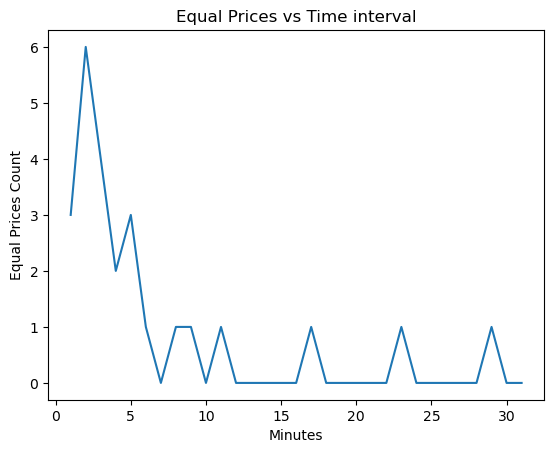

In [163]:
plt.plot(equal_prices_df.time_interval, equal_prices_df.equal_prices_count)
plt.title('Equal Prices vs Time interval')
plt.xlabel('Minutes')
plt.ylabel('Equal Prices Count')
plt.show()

$\quad$As we assumed earlier, in a strong market, the equal prices should be much less compared to a weak market. The graph once again demonstrated an inverse proportionality. In larger time intervals - from 10 minutes and above - the random occurrence of only one equal price is observed. Let's see what the success rate is.

In [164]:
get_balance_percentage(btc_eur_8_8_1_minute), get_balance_percentage(btc_eur_8_8_1_minute, exclude_equal_prices=True)

(0.6159695817490495, 0.6206896551724138)

We have a slight increase in success rate - from nearly 58% in the 10 second dataset with equal prices to nearly 62%. Let's check for intervals from 1 to 30 minutes.

In [165]:
coefficients = calc_correlations_by_time_interval(btc_eur_8_8, 'balance_coeff',range_intervals_in_minutes= [1,30])

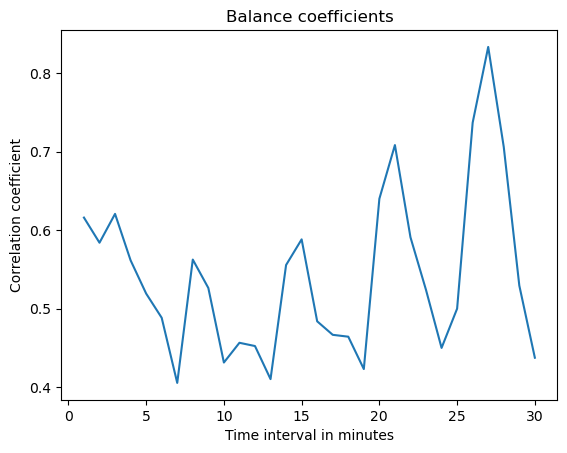

In [166]:
plot_correlations(coefficients, 'Balance coefficients')

In [167]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.5424078499256413, 0.8333333333333334, 0.40540540540540543)

$\quad$Quite an unexpected result. The average success rate drops from 68% in the weak market of the previous dataset to 54% in the strong market. Not only is there no increase in success rate, but the opposite is true - up to the interval of 18-20 minutes, the coefficient is quite low. The maximum value is 83%, but even it falls short of the criterion of at least 85% for accepting the main hypothesis. Thus, based on the results so far, we can reject it. However, let's still check for larger time intervals - say, up to 60 minutes.

In [168]:
coefficients = calc_correlations_by_time_interval(btc_eur_8_8, 'balance_coeff', range_intervals_in_minutes= [1,60],exclude_equal_prices=True)

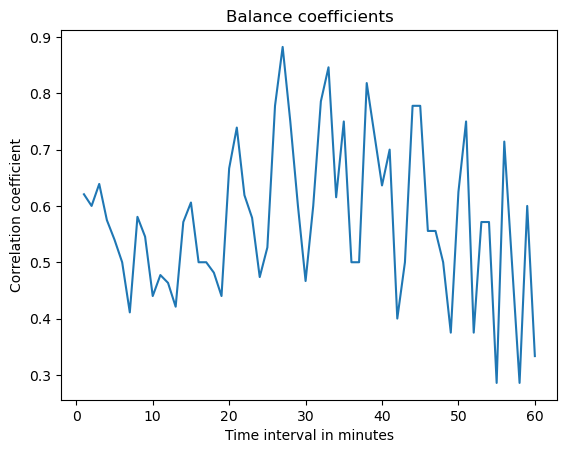

In [169]:
plot_correlations(coefficients, 'Balance coefficients')

In [170]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.5754257859036824, 0.8823529411764706, 0.2857142857142857)

$\quad$Almost the same result - a very slight increase in the average success rate. There's likely some random factor that's strong enough to disrupt the balance coefficient. One such factor could be the price movement itself. As mentioned before, the execution of orders is to a great extent chaotic. To mitigate the effect of this randomness, we can attempt to take the average price value for the corresponding interval we're investigating. Since we don't have information on price movement for the original 10-second interval, we'll calculate the average price for intervals of 1 minute and above.

In [171]:
coefficients = calc_correlations_by_time_interval(btc_eur_8_8, 
                                                  'balance_coeff', 
                                                  range_intervals_in_minutes= [1,30],
                                                  exclude_equal_prices=True, 
                                                  mean_price= True)

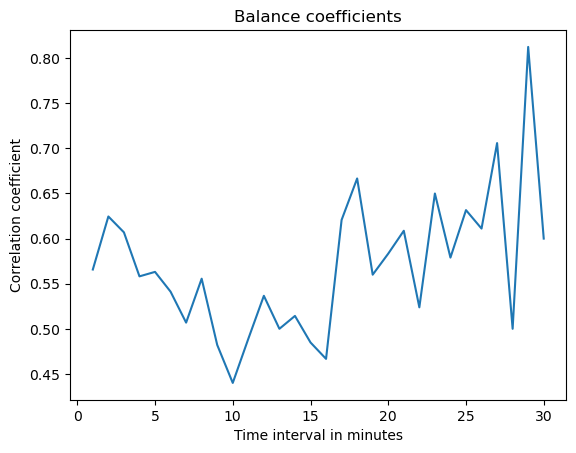

In [172]:
plot_correlations(coefficients, 'Balance coefficients')

In [173]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.5696210678530862, 0.8125, 0.44)

$\quad$A slight increase in the average value compared to the same range of 1 to 30 minutes from the above graph - from 54% to almost 57%. However, the interesting part is that while the maximum coefficient slightly decreased from 0.83 to 0.81, the minimum one increased from 0.28 to 0.44. We can conclude that weakening the impact of random price fluctuations matters.

$\quad$We will investigate another factor that could have a significant impact on **B**. Despite a strong upward trend during the study period, it's not constant - while the price is climbing upwards, we have many small downward movements. Now we will isolate a time segment where there is a strong price increase.

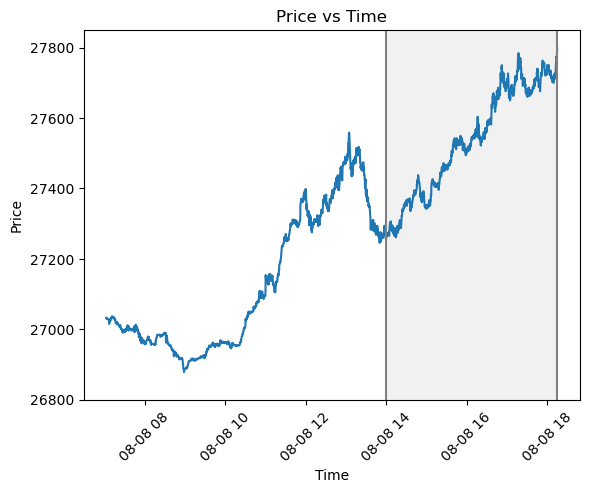

In [174]:
plot_feature_over_time(btc_eur_8_8_max_100, 'price', ylim = [26800, 27850], draw_lines = ['2023-08-08 14:00:00', '2023-08-08 18:15:07'])

In [175]:
last_segment_data = btc_eur_8_8_max_100[(btc_eur_8_8_max_100.time >= '2023-08-08 14:00:00')].copy()

In [176]:
print(overview(last_segment_data))

Start time: 2023-08-08T14:00:02.000000000
End time: 2023-08-08T18:15:07.000000000
Time duration: 0 days 04:15:05 hours
Time duration in minutes: 256
High price: 27800.24
Low price: 27256.06
Average price: 27528.15
Maximum price difference: 544.18
Maximum price change relative to the arithmetic mean price: 1.98%
Total transactions count: 8724
Average number of transactions per minute: 34.08
Total buy quantity: 79.60037 BTC
Total sell quantity: 102.31060 BTC
Total traded quantity: 181.91097 BTC
Average traded quantity per transaction: 0.020852 BTC


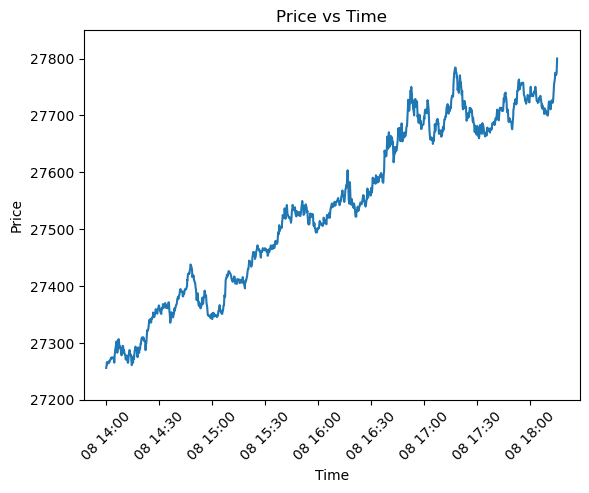

In [177]:
plot_feature_over_time(last_segment_data, 'price', ylim = [27200, 27850])

In [178]:
# Preparing the new dataset
# Reset index
last_segment_data.reset_index(drop=True, inplace=True)

In [179]:
last_segment_data = replace_zeros(last_segment_data, 0.0000001)

In [180]:
last_segment_data = add_balance_coeff(last_segment_data)

In [181]:
last_segment_data = add_is_equal_prices(last_segment_data)

Let's see how many equal prices we have.

In [182]:
last_segment_data.is_previous_equals.value_counts()

False      1163
True         55
unknown       1
Name: is_previous_equals, dtype: int64

In [183]:
get_balance_percentage(last_segment_data), get_balance_percentage(last_segment_data, exclude_equal_prices=True)

(0.5927750410509032, 0.621342512908778)

With the respective calculations of the coefficient for the entire period, we had 58% and 63%. There is no significant increase, which confirms the сurprisingly weak dependence of the coefficient on market activity. We still need to check the breakdown by intervals. Here, we will take intervals from 1 minute to 12 minutes, as the period of this dataset is almost two and a half times smaller - 673 minutes compared to 256. We will calculate using the average price and exclude equal prices.

In [184]:
coefficients = calc_correlations_by_time_interval(last_segment_data, 'balance_coeff', range_intervals_in_minutes= [1,12],exclude_equal_prices=True, mean_price= True)

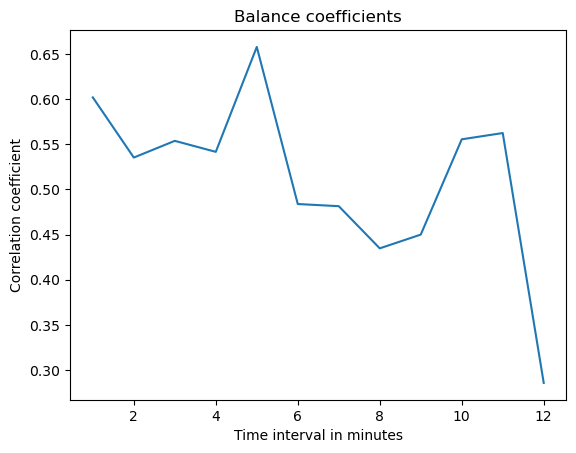

In [185]:
plot_correlations(coefficients, 'Balance coefficients')

In [186]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.5120546701373846, 0.6578947368421053, 0.2857142857142857)

$\quad$The results suggest the conclusion that the balance coefficient is not related to a period of clearly defined price trend.

$\quad$There is one more possibility left to check. It's that the range for which we take the order book volume might have an influence on the coefficient formation. Now, we will take a smaller range of prices. First, let's see how the volumes are distributed in different ranges in order to choose the one with the highest order book volume.

## 5.8.1 Examining the balance coefficient with smaller order book volumes

$\quad$Now we will display the distribution of volumes in the smaller price ranges in this dataset.

In [187]:
# Removing unnecessary columns
btc_eur_8_8_max_100 = btc_eur_8_8_max_100.drop(columns=['bids_0_99', 'asks_0_99'])

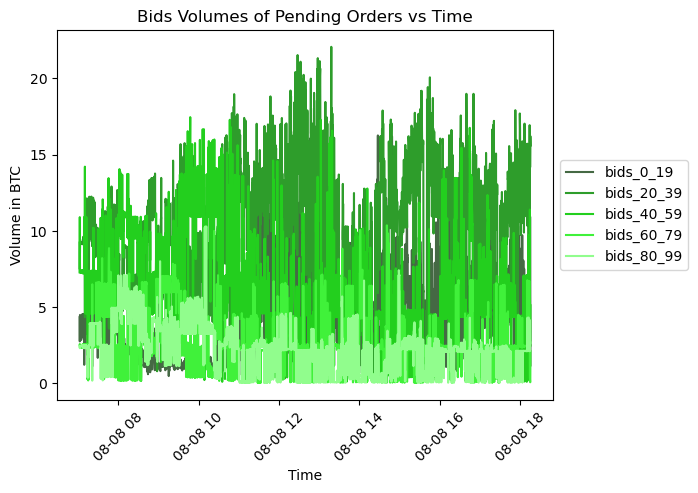

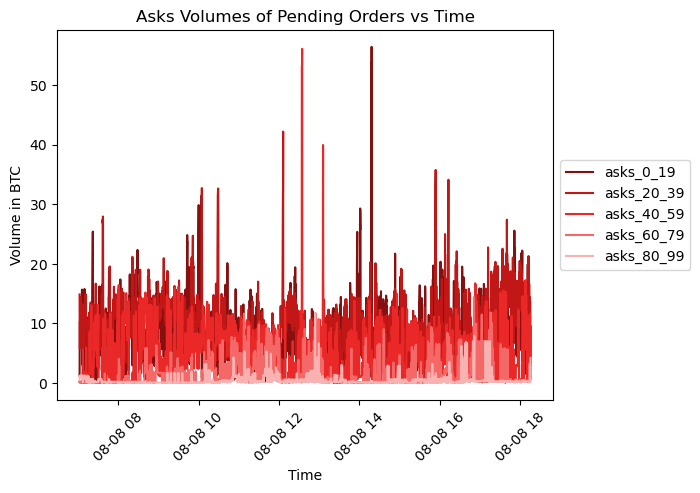

In [188]:
plot_volumes(btc_eur_8_8_max_100)

In [189]:
show_volumes_means_by_level(btc_eur_8_8_max_100)

bids_0_19 4.490931
bids_20_39 10.371499
bids_40_59 6.081788
bids_60_79 2.723473
bids_80_99 2.276614
asks_0_19 6.744426
asks_20_39 9.044744
asks_40_59 5.160264
asks_60_79 1.566763
asks_80_99 0.424162


$\quad$What's interesting is that the highest average value exists in the 20_39 range for both cases, while in the closest range, 0_19, the values are almost half as small. Simultaneously, as expected, the farthest ranges - 60_79 and 80_99 - have the smallest values. In other words, the primary volume in the supply is within the 0_59 range. It follows that this range is likely to have the greatest influence on the balance coefficient.

$\quad$We will start with the closest range - 0_19. We will examine both the supply and demand in separate time segments simultaneously.

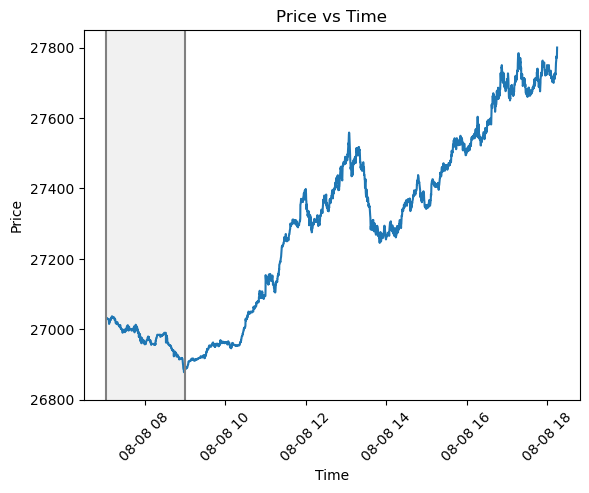

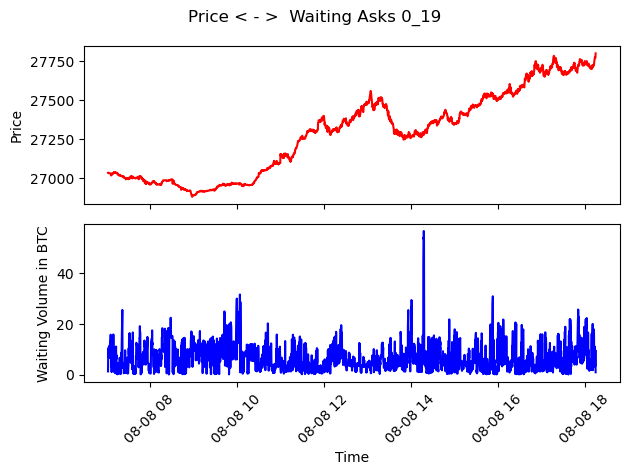

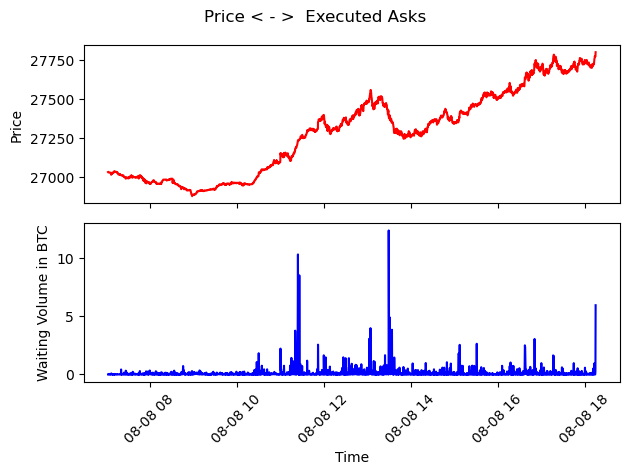

In [190]:
plot_feature_over_time(btc_eur_8_8_max_100, 'price', ylim = [26800, 27850], draw_lines = ['2023-08-08 07:02:30', '2023-08-08 09:00:00'])
messages = {
    'title': 'Price < - >  Waiting Asks 0_19',
    'top_y_label': 'Price',
    'bottom_y_label': 'Waiting Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_8_8_max_100.price.values, btc_eur_8_8_max_100.asks_0_19.values, btc_eur_8_8_max_100.time.values, 0, len(btc_eur_8_8_max_100.time.values),messages)

messages = {
    'title': 'Price < - >  Executed Asks',
    'top_y_label': 'Price',
    'bottom_y_label': 'Waiting Volume in BTC',
    'x_label': 'Time'
}
plot_one_above_another(btc_eur_8_8_max_100.price.values, btc_eur_8_8_max_100.sell_qty.values, btc_eur_8_8_max_100.time.values, 0, len(btc_eur_8_8_max_100.time.values),messages)

In [191]:
mean_asks_volume1 = btc_eur_8_8_max_100[btc_eur_8_8_max_100.time <= '2023-08-08 09:00:00'].asks_0_19.mean()
total_asks_executed1 = btc_eur_8_8_max_100[btc_eur_8_8_max_100.time <= '2023-08-08 09:00:00'].sell_qty.sum()
print(f'Mean waiting sell volume: {mean_asks_volume1}')
print(f'Total executed Asks: {total_asks_executed1}')

Mean waiting sell volume: 7.091243500000001
Total executed Asks: 20.387559999999993


$\quad$Now we will compare these values with the next period in which we have a price increase. We will take the same-sized time interval of 1 hour and 58 minutes.

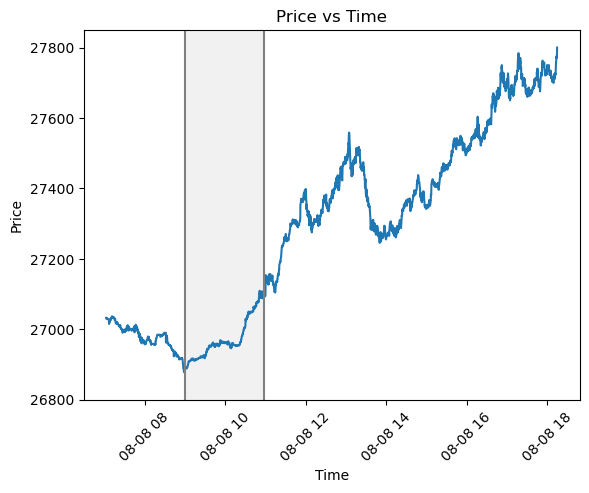

In [192]:
plot_feature_over_time(btc_eur_8_8_max_100, 'price', ylim = [26800, 27850], draw_lines = ['2023-08-08 09:00:0', '2023-08-08 10:58:00'])

In [193]:
mean_asks_volume2 = btc_eur_8_8_max_100[(btc_eur_8_8_max_100.time >= '2023-08-08 09:00:00') &  (btc_eur_8_8_max_100.time <= '2023-08-08 10:58:00')].asks_0_19.mean()
total_asks_executed2 = btc_eur_8_8_max_100[(btc_eur_8_8_max_100.time >= '2023-08-08 09:00:00') &  (btc_eur_8_8_max_100.time <= '2023-08-08 10:58:00')].sell_qty.sum()
print(f'Mean waiting Asks volume: {mean_asks_volume2}')
print(f'Total executed Asks: {total_asks_executed2}')

Mean waiting Asks volume: 8.799392382608694
Total executed Asks: 27.284639999999992


In [194]:
print(f'Mean Asks volume change: {mean_asks_volume2/mean_asks_volume1:.2f}%')
print(f'Total executed Asks change: {total_asks_executed2/total_asks_executed1:.2f}%')

Mean Asks volume change: 1.24%
Total executed Asks change: 1.34%


$\quad$In the second period, we observe an increase in supply, but also a larger increase in demand, which, in line with the main hypothesis, should lead to a price increase. Nevertheless, let's also examine the situation with **Bids**.

In [195]:
mean_bids_volume1 = btc_eur_8_8_max_100[btc_eur_8_8_max_100.time <= '2023-08-08 09:00:00'].bids_0_19.mean()
total_bids_executed1 = btc_eur_8_8_max_100[btc_eur_8_8_max_100.time <= '2023-08-08 09:00:00'].buy_qty.sum()
print(f'Mean waiting Bids volume: {mean_bids_volume1}')
print(f'Total executed Bids: {total_bids_executed1}')

Mean waiting Bids volume: 3.4886047142857177
Total executed Bids: 46.06473


In [196]:
mean_bids_volume2 = btc_eur_8_8_max_100[(btc_eur_8_8_max_100.time >= '2023-08-08 09:00:00') &  (btc_eur_8_8_max_100.time <= '2023-08-08 10:58:00')].bids_0_19.mean()
total_bids_executed2 = btc_eur_8_8_max_100[(btc_eur_8_8_max_100.time >= '2023-08-08 09:00:00') &  (btc_eur_8_8_max_100.time <= '2023-08-08 10:58:00')].buy_qty.sum()
print(f'Mean waiting Bids volume: {mean_bids_volume2}')
print(f'Total executed Bids: {total_bids_executed2}')

Mean waiting Bids volume: 1.5218653565217397
Total executed Bids: 15.879709999999996


In [197]:
print(f'Mean Bids volume change: {mean_bids_volume2/mean_bids_volume1:.2f}%')
print(f'Total executed Bids change: {total_bids_executed2/total_bids_executed1:.2f}%')

Mean Bids volume change: 0.44%
Total executed Bids change: 0.34%


$\quad$In the first period for **Bids**, we have low average supply and high demand, which implies a price decrease. Furthermore, the exact value of supply for **Bids** - **3.488604** is significantly lower than the exact value of supply for **Asks** - **7.09124**, while the demand for **Bids** - **46.06473** is significantly higher than the demand for **Asks** - **20.38755**. Conversely, in the second period, we observe a significant decrease in supply - **1.52186** - and demand for **Bids** - **15.879709**, along with an increase in both supply and demand for **Asks** - respectively **8.79939** and **27.28463**, suggesting a predominance of the 'forces' on the **Asks** side and a corresponding price increase. Sure, let's manually calculate the balance coefficients for the two periods separately.

In [198]:
B_coeff_first = (total_asks_executed1 * mean_bids_volume1)/(mean_asks_volume1 * total_bids_executed1)
B_coeff_second = (total_asks_executed2 * mean_bids_volume2)/(mean_asks_volume2 * total_bids_executed2)
print(f'B coeff fisrt period: {B_coeff_first}')
print(f'B coeff second period: {B_coeff_second}')

B coeff fisrt period: 0.21773391775681808
B coeff second period: 0.2971660610922048


$\quad$And here we can see that the formula for **B** doesn't accurately reflect what's happening. In the first period, we have a price decrease and **B < 1**. In the second case, however, the price increases, but again **B < 1**. There are two possible explanations for this:

1. The formula is incorrect, or more precisely, the logic behind the formula is incorrect. The author doesn't believe this is the reason; the formula is based on a very basic market logic that drives the prices of commodities and currencies.

2. The analysis proposed in the above paragraph is flawed. Let's examine separately how the forces of **Asks** and **Bids** are changing in the two intervals.

In [199]:
asks_first = total_asks_executed1 / mean_asks_volume1
bids_first = total_bids_executed1 / mean_bids_volume1
asks_second = total_asks_executed2 / mean_asks_volume2
bids_second = total_bids_executed2 / mean_bids_volume2
print(f'Asks first: {asks_first}    Bids first: {bids_first}')
print(f'Asks second: {asks_second}    Bids second: {bids_second}')

Asks first: 2.8750331306490873    Bids first: 13.204342071592833
Asks second: 3.1007413709526053    Bids second: 10.434372483708716


$\quad$It's evident that in both cases, the forces of **Bids** have the upper hand. However, in the second interval, the price still increases. This doesn't support the main hypothesis. Furthermore, it demonstrates the importance of not making analyses before examining the actual numbers.

$\quad$Let's now prepare the current dataset for calculating the balance coefficient.

In [200]:
btc_eur_8_8_0_19 = btc_eur_8_8_max_100.drop(columns=['bids_20_39','bids_40_59', 'bids_60_79', 'bids_80_99', 'asks_20_39','asks_40_59', 'asks_60_79', 'asks_80_99'])

In [201]:
btc_eur_8_8_0_19 = replace_zeros(btc_eur_8_8_0_19, 0.0000001)

In [202]:
btc_eur_8_8_0_19 = add_balance_coeff(btc_eur_8_8_0_19, columns = ['bids_0_19', 'asks_0_19'])

In [203]:
btc_eur_8_8_0_19 = add_is_equal_prices(btc_eur_8_8_0_19, columns = ['bids_0_19', 'asks_0_19'])

In [204]:
btc_eur_8_8_0_19.head()

,id,time,price,is_previous_equals,buy_qty,sell_qty,bids_0_19,asks_0_19,balance_coeff,match_balance_coeff
0,126428417,2023-08-08 07:02:30,27032.28,unknown,9.410000e-02,1.000000e-07,4.32627,1.24960,0.000004,unknown
1,126428418,2023-08-08 07:02:49,27029.83,False,8.560000e-03,1.000000e-07,2.73835,10.28012,0.000003,True
2,126428419,2023-08-08 07:03:08,27031.04,False,1.000000e-07,9.300000e-04,4.47338,10.32265,4030.208716,True
3,126428422,2023-08-08 07:03:17,27031.03,False,3.771000e-02,1.000000e-07,4.36533,7.65305,0.000002,True
4,126428425,2023-08-08 07:03:31,27031.07,False,2.430000e-03,1.790000e-03,4.36495,6.82401,0.471179,False


In [205]:
get_balance_percentage(btc_eur_8_8_0_19),get_balance_percentage(btc_eur_8_8_0_19, exclude_equal_prices=True)

(0.5515170670037927, 0.6078021595262975)

$\quad$The coefficients are lower compared to those for the 0_99 range - respectively 0.577 and 0.636. Let's see if they remain lower in the interval breakdowns as well.

In [206]:
coefficients = calc_correlations_by_time_interval(btc_eur_8_8_0_19, 
                                                  'balance_coeff', 
                                                  range_intervals_in_minutes= [1,30],
                                                  exclude_equal_prices=True, 
                                                  mean_price= True,
                                                  columns = ['bids_0_19', 'asks_0_19'])

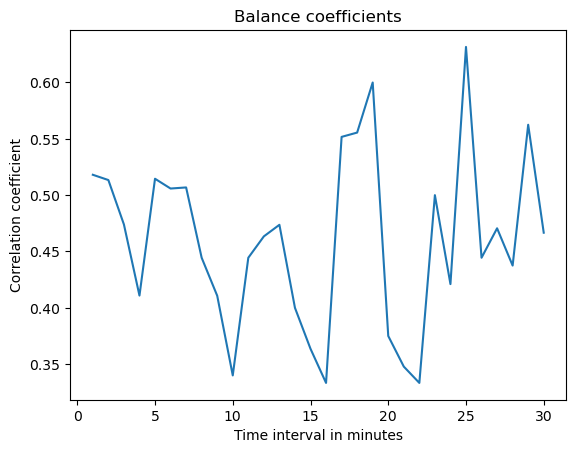

In [207]:
plot_correlations(coefficients, 'Balance coefficients')

In [208]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.46050276274820245, 0.631578947368421, 0.3333333333333333)

$\quad$We have a decrease across all indicators - for the range 0_99, the corresponding values are 0.569, 0.8125 and 0.44. We can assume that smaller ranges are more dynamic, and this affects the accuracy. Therefore, with an increase in the range, the accuracy should also increase. We can create a graph of the ratio between the waiting **Asks** and **Bids**.

In [209]:
volumes_ratio = btc_eur_8_8_0_19.asks_0_19/btc_eur_8_8_0_19.bids_0_19

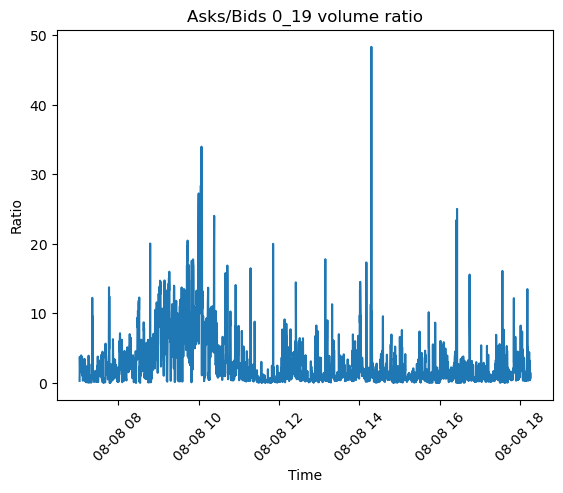

In [210]:
plt.plot(btc_eur_8_8_0_19.time, volumes_ratio)
plt.title('Asks/Bids 0_19 volume ratio')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.xticks(rotation= 45)
plt.show()

In [211]:
volumes_ratio.mean(),volumes_ratio.max(),volumes_ratio.min() 

(2.812403227453462, 48.35243401338573, 0.009907991608457541)

$\quad$Here we see a large maximum, a small minimum, and an average value of 2.81. Let's now go back to the previous dataset and see the ratio of **Asks** to **Bids** for its smallest price range - 0_99. According to the above assumption, increasing the range should gradually balance out the waiting volumes, causing their average ratio to tend more and more towards one.

In [212]:
volumes_ratio = btc_eur_data.asks_0_99/ btc_eur_data.bids_0_99

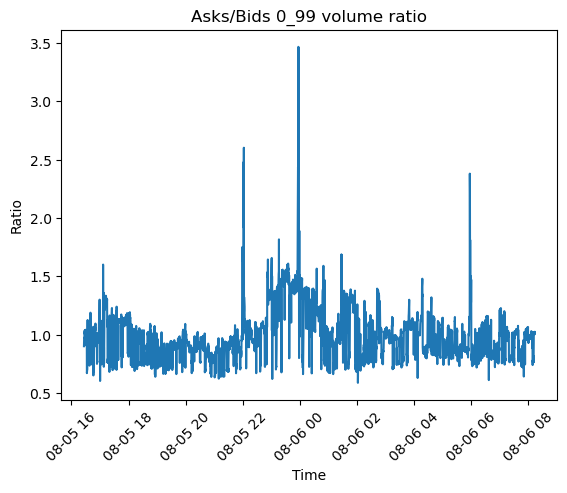

In [213]:
plt.plot(btc_eur_data.time, volumes_ratio)
plt.title('Asks/Bids 0_99 volume ratio')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.xticks(rotation= 45)
plt.show()

In [214]:
volumes_ratio.mean(),volumes_ratio.max(),volumes_ratio.min() 

(0.9904685346814364, 3.467387972287925, 0.5880365632233298)

$\quad$As expected, the difference between the maximum and minimum is decreasing, and the average ratio is almost equal to one. And this is already the case for the smaller range of 0_99. For even larger ranges, such as in **btc_eur_data** **0_499**, it should be practically equal to one. This means that if we rewrite formula (6) in the form:

$$B_{t} = \frac{D_{A_{t}}}{D_{B_{t}}}\frac{S_{B_{t}}}{S_{A_{t}}}\quad\quad\quad\quad(7)$$

then

$$\frac{S_{B_{t}}}{S_{A_{t}}}=1\quad\quad\quad\quad(8)$$

and 

$$B_{t} = \frac{D_{A_{t}}}{D_{B_{t}}}\quad\quad\quad\quad(9)$$

$\quad$And so, we come to the conclusion that the waiting volumes decrease the accuracy of the balance coefficient. Is that really the case? It's certainly true for the ranges close to the current price, such as 0_19 in the current dataset. This can be easily verified.

In [215]:
btc_eur_8_8_0_19_without_volumes = add_balance_coeff(btc_eur_8_8_0_19, columns = ['bids_0_19', 'asks_0_19'], exclude_waiting_volumes= True)

In [216]:
get_balance_percentage(btc_eur_8_8_0_19_without_volumes),get_balance_percentage(btc_eur_8_8_0_19_without_volumes, exclude_equal_prices=True)

(0.570480404551201, 0.6287008011145943)

$\quad$Indeed, there is an increase in accuracy, but it's relatively small - for comparison, the corresponding results when calculating the waiting volumes are 0.55 and 0.60. The time period check is next.

In [217]:
coefficients = calc_correlations_by_time_interval(btc_eur_8_8_0_19, 
                                                  'balance_coeff', 
                                                  range_intervals_in_minutes= [1,30],
                                                  exclude_equal_prices=True, 
                                                  mean_price= True,
                                                  columns = ['bids_0_19', 'asks_0_19'],
                                                  exclude_waiting_volumes=True)

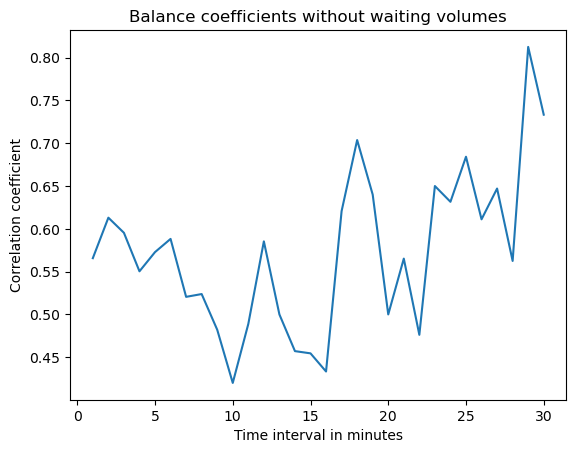

In [218]:
plot_correlations(coefficients, 'Balance coefficients without waiting volumes')

In [219]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.5729808644978135, 0.8125, 0.42)

$\quad$The corresponding results for the time intervals with calculating the order book volumes are 0.46, 0.63 and 0.333. These are significant increases, with the percentages being 24%, 28.5% and 27%. In the second half of the graph - from 15 minutes onwards, the trend appears to be increasing. It's interesting to see if this indicates a trend of increasing accuracy with longer intervals. Let's take a larger range - from 1 to 60 minutes.

In [220]:
coefficients = calc_correlations_by_time_interval(btc_eur_8_8_0_19, 
                                                  'balance_coeff', 
                                                  range_intervals_in_minutes= [1,60],
                                                  exclude_equal_prices=True, 
                                                  mean_price= False,
                                                  columns = ['bids_0_19', 'asks_0_19'],
                                                  exclude_waiting_volumes=True)

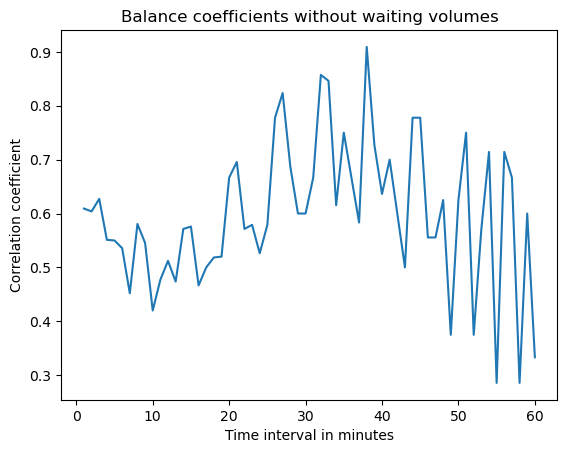

In [221]:
plot_correlations(coefficients, 'Balance coefficients without waiting volumes')

In [222]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.5973974135223018, 0.9090909090909091, 0.2857142857142857)

$\quad$An increase of 2% in the average coefficient and a significant difference between the maximum and minimum. For the first time, we have a coefficient value greater than our chosen evaluation threshold - 0.9 compared to an evaluation threshold of at least 0.85. However, this result cannot be accepted as confirmation of the hypothesis, as it's an isolated case on one hand, and on the other, for large time intervals, the accuracy of the metric significantly decreases. Now we will perform measurements using the simplified formula for the previous dataset - first for the range 0_99. We will calculate under the same conditions as the calculations for this dataset from the previous part of the project - we won't calculate the average price for intervals and we will exclude identical prices.

In [223]:
coefficients = calc_correlations_by_time_interval(dataset_with_B_coeff, 
                                                  'balance_coeff', 
                                                  range_intervals_in_minutes= [1,30],
                                                  exclude_equal_prices=True, 
                                                  mean_price= False,
                                                  exclude_waiting_volumes=True)

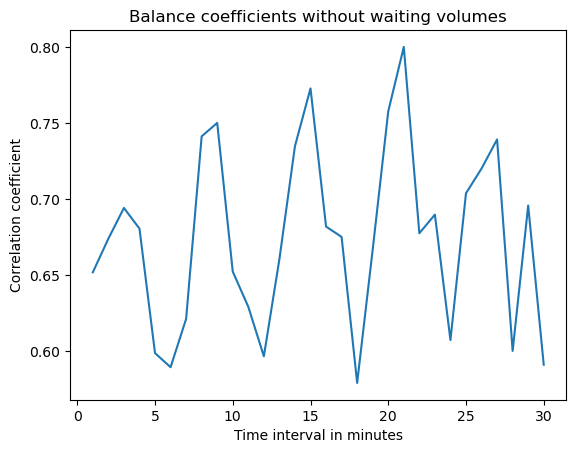

In [224]:
plot_correlations(coefficients, 'Balance coefficients without waiting volumes')

In [225]:
coefficients.correlation_coefficient.mean(),coefficients.correlation_coefficient.max(),coefficients.correlation_coefficient.min()

(0.6743091356565399, 0.8, 0.5789473684210527)

The values from the measurement - with slight differences - are the same with the reduced formula. From the previous measurement, they were respectively 0.68, 0.766 and 0.59. 

$\quad$Finally, to check whether excluding the pending orders from the formula would affect the accuracy if we calculate them for a much larger interval, we will sum up the pending orders for the entire range of the previous dataset - 0_499.

In [226]:
# Preparing dataset
btc_eur_data_total_volumes = create_total_volumes_dataset(btc_eur_data)

In [227]:
btc_eur_data_total_volumes = replace_zeros(btc_eur_data_total_volumes, 0.0000001)

In [228]:
btc_eur_data_total_volumes = add_balance_coeff(btc_eur_data_total_volumes, columns=['bids_0_499', 'asks_0_499'])

In [229]:
btc_eur_data_total_volumes = add_is_equal_prices(btc_eur_data_total_volumes, columns=['bids_0_499', 'asks_0_499'])

Let's take a look at the volume ratio.

In [230]:
volumes_ratio = btc_eur_data_total_volumes.asks_0_499/ btc_eur_data.bids_0_499

In [231]:
volumes_ratio.mean(),volumes_ratio.max(),volumes_ratio.min() 

(0.7985784950019056, 2.159344107464309, 0.5299807004083891)

$\quad$Again, an unexpected result - the volume ratio of the range 0_499 does not tend towards zero at all, even though the market in this dataset is weak. We have an overall dominance of **Bid** volume - 0.79. This means that we cannot exclude the waiting volumes from the formula, even though in many cases, they are the reason for its inaccuracy. Let's still check what the values of the balance coefficient will be for the entire price range.

In [232]:
get_balance_percentage(btc_eur_data_total_volumes, exclude_equal_prices = True)

0.6947546531302876

In [233]:
get_balance_percentage(btc_eur_data_total_volumes, exclude_equal_prices = False)

0.45210306099977976

$\quad$If we compare these results with the calculations using the order book volumes in the range 0_99, we will see that they are practically identical - 0.70 and 0.45.

$\quad$We can conclude that introducing order book volumes in large price ranges practically does not change the balance coefficient. But the reason not to change it is not that the volume ratio fluctuates around one. This assumption was incorrect. The real reason is that as we move away from the current price, the waiting volumes decrease overall, which means their impact on the ratio value will diminish. Because of this reason, the range 0_499 yields almost the same value as the range 0_99.

$\quad$On the other hand, introduction of the waiting volumes in very small ranges (0_19) has more of an effect on it - reducing the accuracy by about 25% on average. This implies that they can be removed from the formula.

In [234]:
а = add_balance_coeff(btc_eur_data_total_volumes, columns=['bids_0_499', 'asks_0_499'], exclude_waiting_volumes= True)

In [235]:
get_balance_percentage(а, exclude_equal_prices = True),get_balance_percentage(а, exclude_equal_prices = False)

(0.6981387478849408, 0.4549658665492182)

$\quad$In this last test, we can see that if we remove waiting volumes from the formula, the accuracy of the balance coefficient remains unchanged. Here, our ideas about what prevents the balance coefficient from reaching the desired accuracy to confirm the main hypothesis come to an end. This leads us to the conclusion of this investigation.

## 6. Conclusion

Based on the data from the available datasets and their analysis, we can make the following general conclusion: 
 <center>**_We reject the main hypothesis_**<center>

We reject the main hypothesis based on two indicators:
    
1. The chosen model - the balance coefficient - and its metric did not yield a result greater than or equal to 0.85. Only in a few isolated cases did it reach values close to the required threshold, but due to the lack of sufficiently large datasets, they cannot be confirmed. In most cases, the value was around 0.6.
    
2. The formulation of the hypothesis includes the assertion that both factors - demand and supply - together determine the price movement. However, the analysis demonstrated that the ratio of the provided waiting quantities of **Bids** and **Asks** in large price ranges hardly affects the accuracy of the balance coefficient. In small price ranges, it even diminishes it. In this sense, the assertion of the main hypothesis is not accurate. It turns out that the determining factor is solely the demand.
    
Apart from rejecting the hypothesis, the achieved result from the analysis holds significance on its own. It can be stated that the demand factor turns out to be a key driver in price movement since it accurately reflects its movement in over 50% of cases. Therefore, there's a basis to assert that demand is a primary driver responsible for more than 50% of its movement. The analysis hinted that this percentage might increase further with larger time intervals. This question can only be resolved by gathering more data.

## 7. Speculations

$\quad$The question remains as to what factors are responsible for the significant percentage of inaccuracy. These factors could purely be technical, related to server operations and order execution methods. In this regard, in short time intervals, these factors might have a substantial influence. Another possible factor is intentional influence on price movement by cryptocurrency exchanges. Such a assumption could fall into the realm of conspiracy theories, but it's important to acknowledge that this is a real possibility – cryptocurrency exchanges have complete control over order execution on one hand, and, on the other hand, they can influence trading even in the role of regular participants who place and execute orders.

$\quad$There is yet another interesting question. From the analysis - if conducted correctly - it becomes clear that the volume ratio of the resting orders does not have a significant correlation with the price movement. How is it possible for people's expectations to not matter? What happens in the market is the cumulative result of traders' actions. And their actions, in turn, are guided by their expectations, assumptions, desires, and so on. The question is: is it really the traders' actions that drive the price movement?

## 8. Dictionary

$\quad$**_limit buy order_** - A buy limit order will be executed only at the limit price or a lower price.

$\quad$**_limit sell order_** - A sell limit order will be executed only at the limit price or a higher one.

$\quad$**_market buy order_** - A market order is an instruction to buy a security immediately at the current price.

$\quad$**_market sell order_** - A market order is an instruction to sell a security immediately at the current price.

$\quad$**_currency pair_** - A currency pair is a price quote of the exchange rate for two different currencies traded in FX and/or Cryptocurrency markets. When an order is placed for a currency pair, the first listed currency - or base currency - is bought while the second listed currency in a currency pair - or quote currency - is sold.

$\quad$**_volatility_** - Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured from either the standard deviation or variance between returns from that same security or market index.In the securities markets, volatility is often associated with big swings in either direction. For example, when the stock market rises and falls more than one percent over a sustained period of time, it is called a volatile market. An asset's volatility is a key factor when pricing options contracts.

$\quad$**_order book events_** - An event in the order book is referred to as placing, canceling, or executing a resting order, as well as executing a market order.

$\quad$**_ask_** - The ask is the lowest price where someone is willing to sell a share. On Binance, the waiting Ask prices are those above the current price and are typically colored in red.

$\quad$**_bid_** - The bid represents the highest price someone is willing to pay for a share - the green ones below the current price on Binance dashboard.

$\quad$**_spread_** - The difference between bid and ask is called the spread. On Binance exchange the spread is practicaly equal to zero.
